In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [3]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [4]:
data = pd.read_csv('my_df.csv')
data = data.drop('Unnamed: 0', axis=1)

In [5]:
data = data.sort_values('var(lnpolice)', ascending=False)
data

,county,var(lnpolice)
62,141,2.926936
83,185,1.474635
66,149,0.391330
79,175,0.290386
88,195,0.220718
...,...,...
19,45,0.000532
13,27,0.000515
80,179,0.000513
42,97,0.000508


In [6]:
data.tail()

,county,var(lnpolice)
19,45,0.000532
13,27,0.000515
80,179,0.000513
42,97,0.000508
25,57,0.000369


In [7]:
data['county'] = data['county'].apply(lambda x: str(x))

In [8]:
dataset_1 = data[data['var(lnpolice)'] > 0.005]
dataset_2 = data[data['var(lnpolice)'] <= 0.005]

In [9]:
len(dataset_1), len(dataset_2)

(42, 48)

In [10]:
counties = dataset_1['county']
variation = dataset_1['var(lnpolice)']

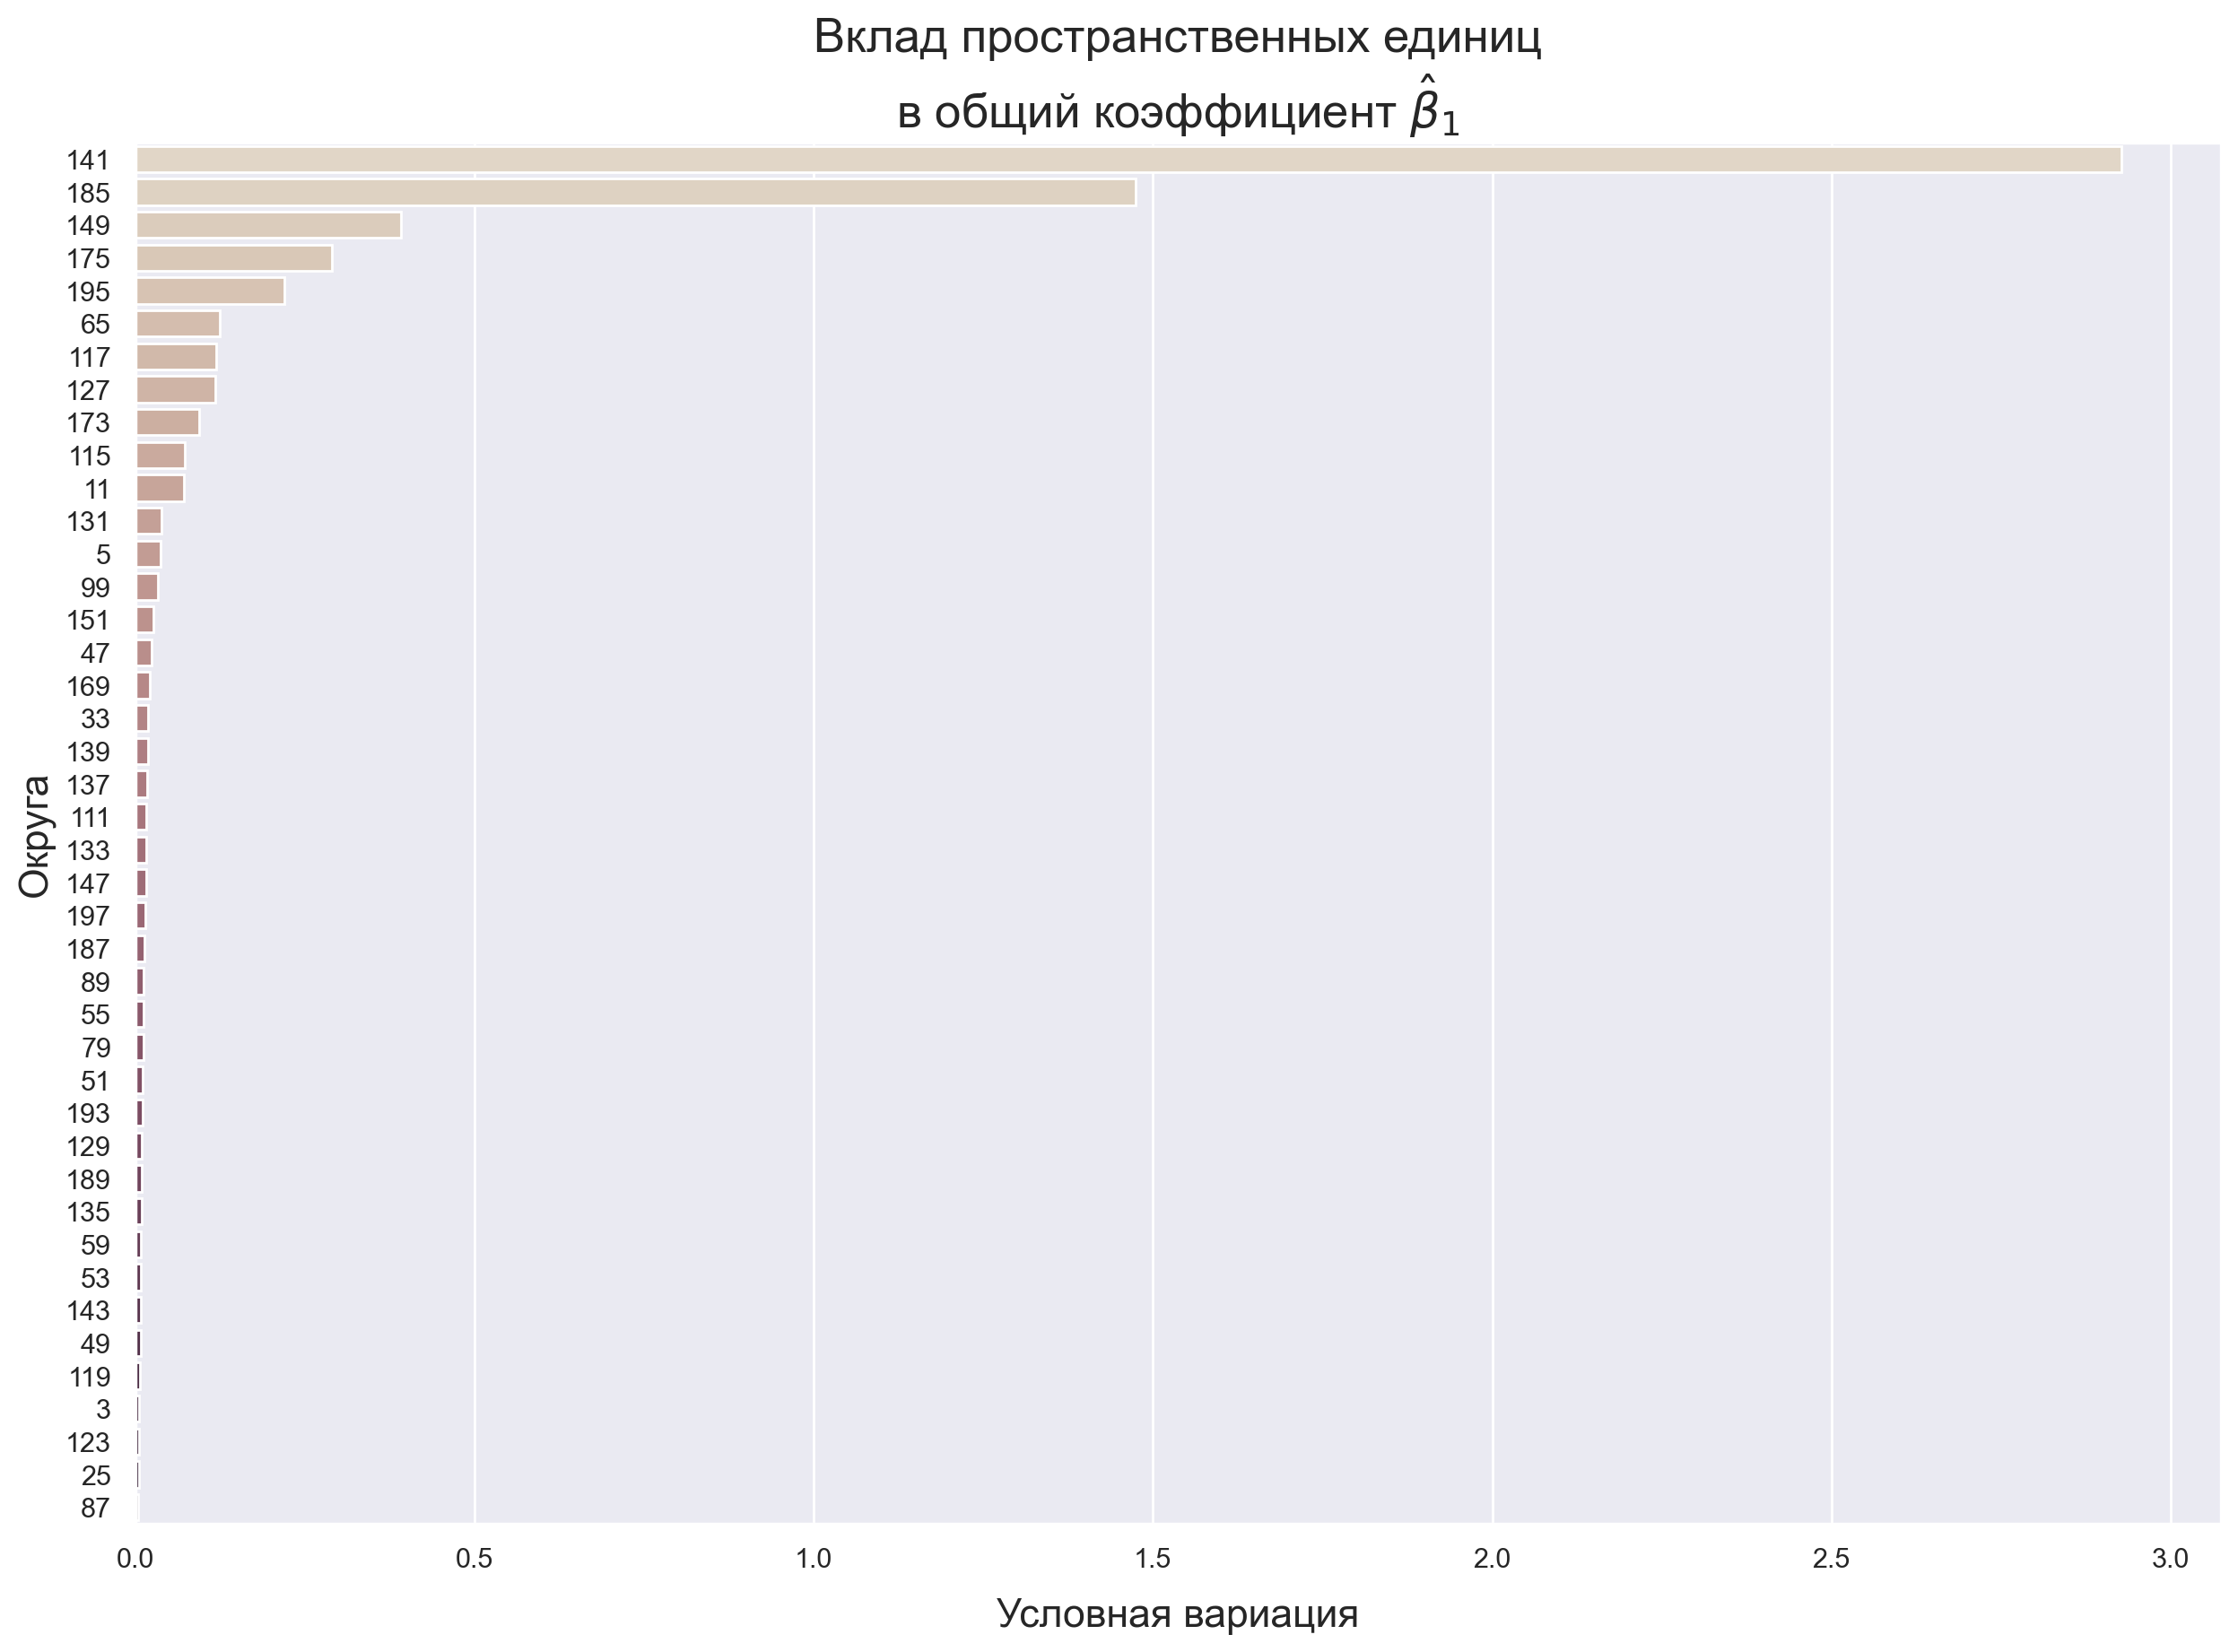

In [11]:
plot = sns.barplot(x=variation, y=counties, palette="ch:.25")
plot.figure.set_size_inches(15, 10)

plt.title('Вклад пространственных единиц\nв общий коэффициент $\hat{β}_1$', fontsize=19)
plt.xlabel('Условная вариация', fontsize=16, labelpad=10.0)
plt.ylabel('Округа', fontsize=16)

plt.show()

In [12]:
plot.figure.savefig("fig1.pdf")

In [13]:
const = sum(data['var(lnpolice)'])

new_df = data.copy()
new_df['newvar'] = new_df['var(lnpolice)'] / const

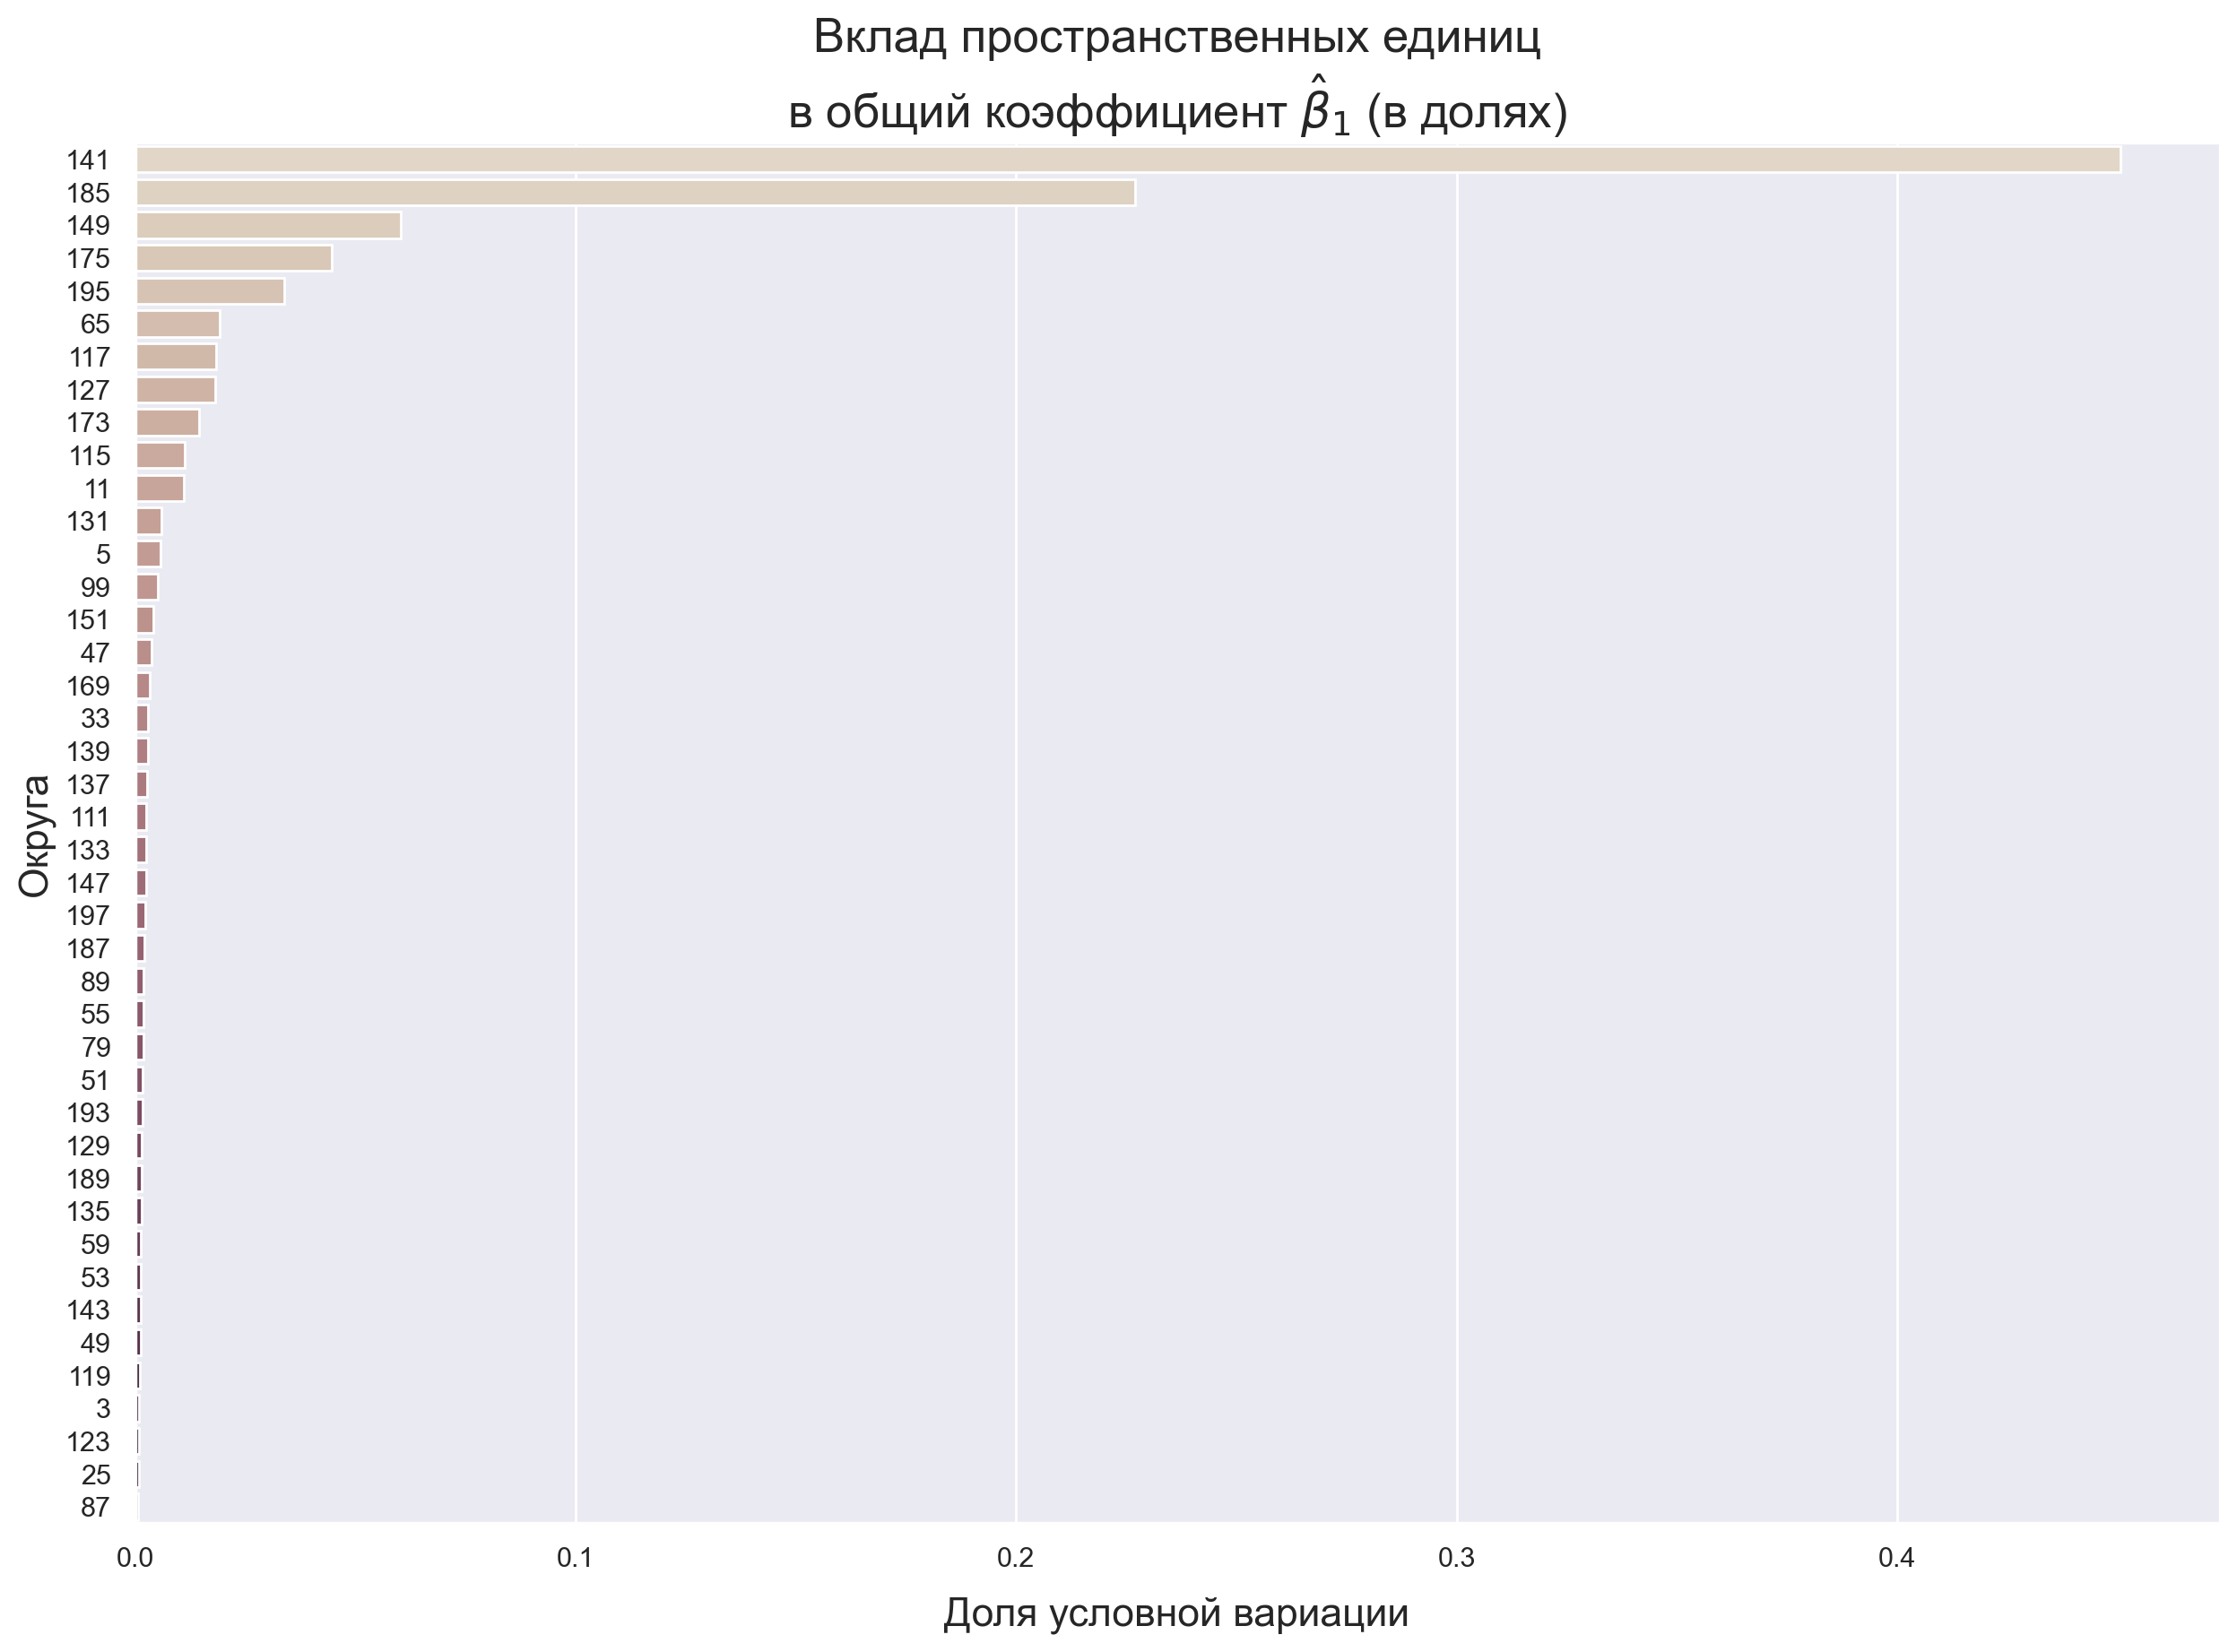

In [14]:
plot = sns.barplot(x=new_df['newvar'][:42], y=new_df['county'][:42], palette="ch:.25")
plot.figure.set_size_inches(15, 10)

plt.title('Вклад пространственных единиц\nв общий коэффициент $\hat{β}_1$ (в долях)', fontsize=19)
plt.xlabel('Доля условной вариации', fontsize=16, labelpad=10.0)
plt.ylabel('Округа', fontsize=16)

plt.show()

In [15]:
plot.figure.savefig("fig2_1.pdf")

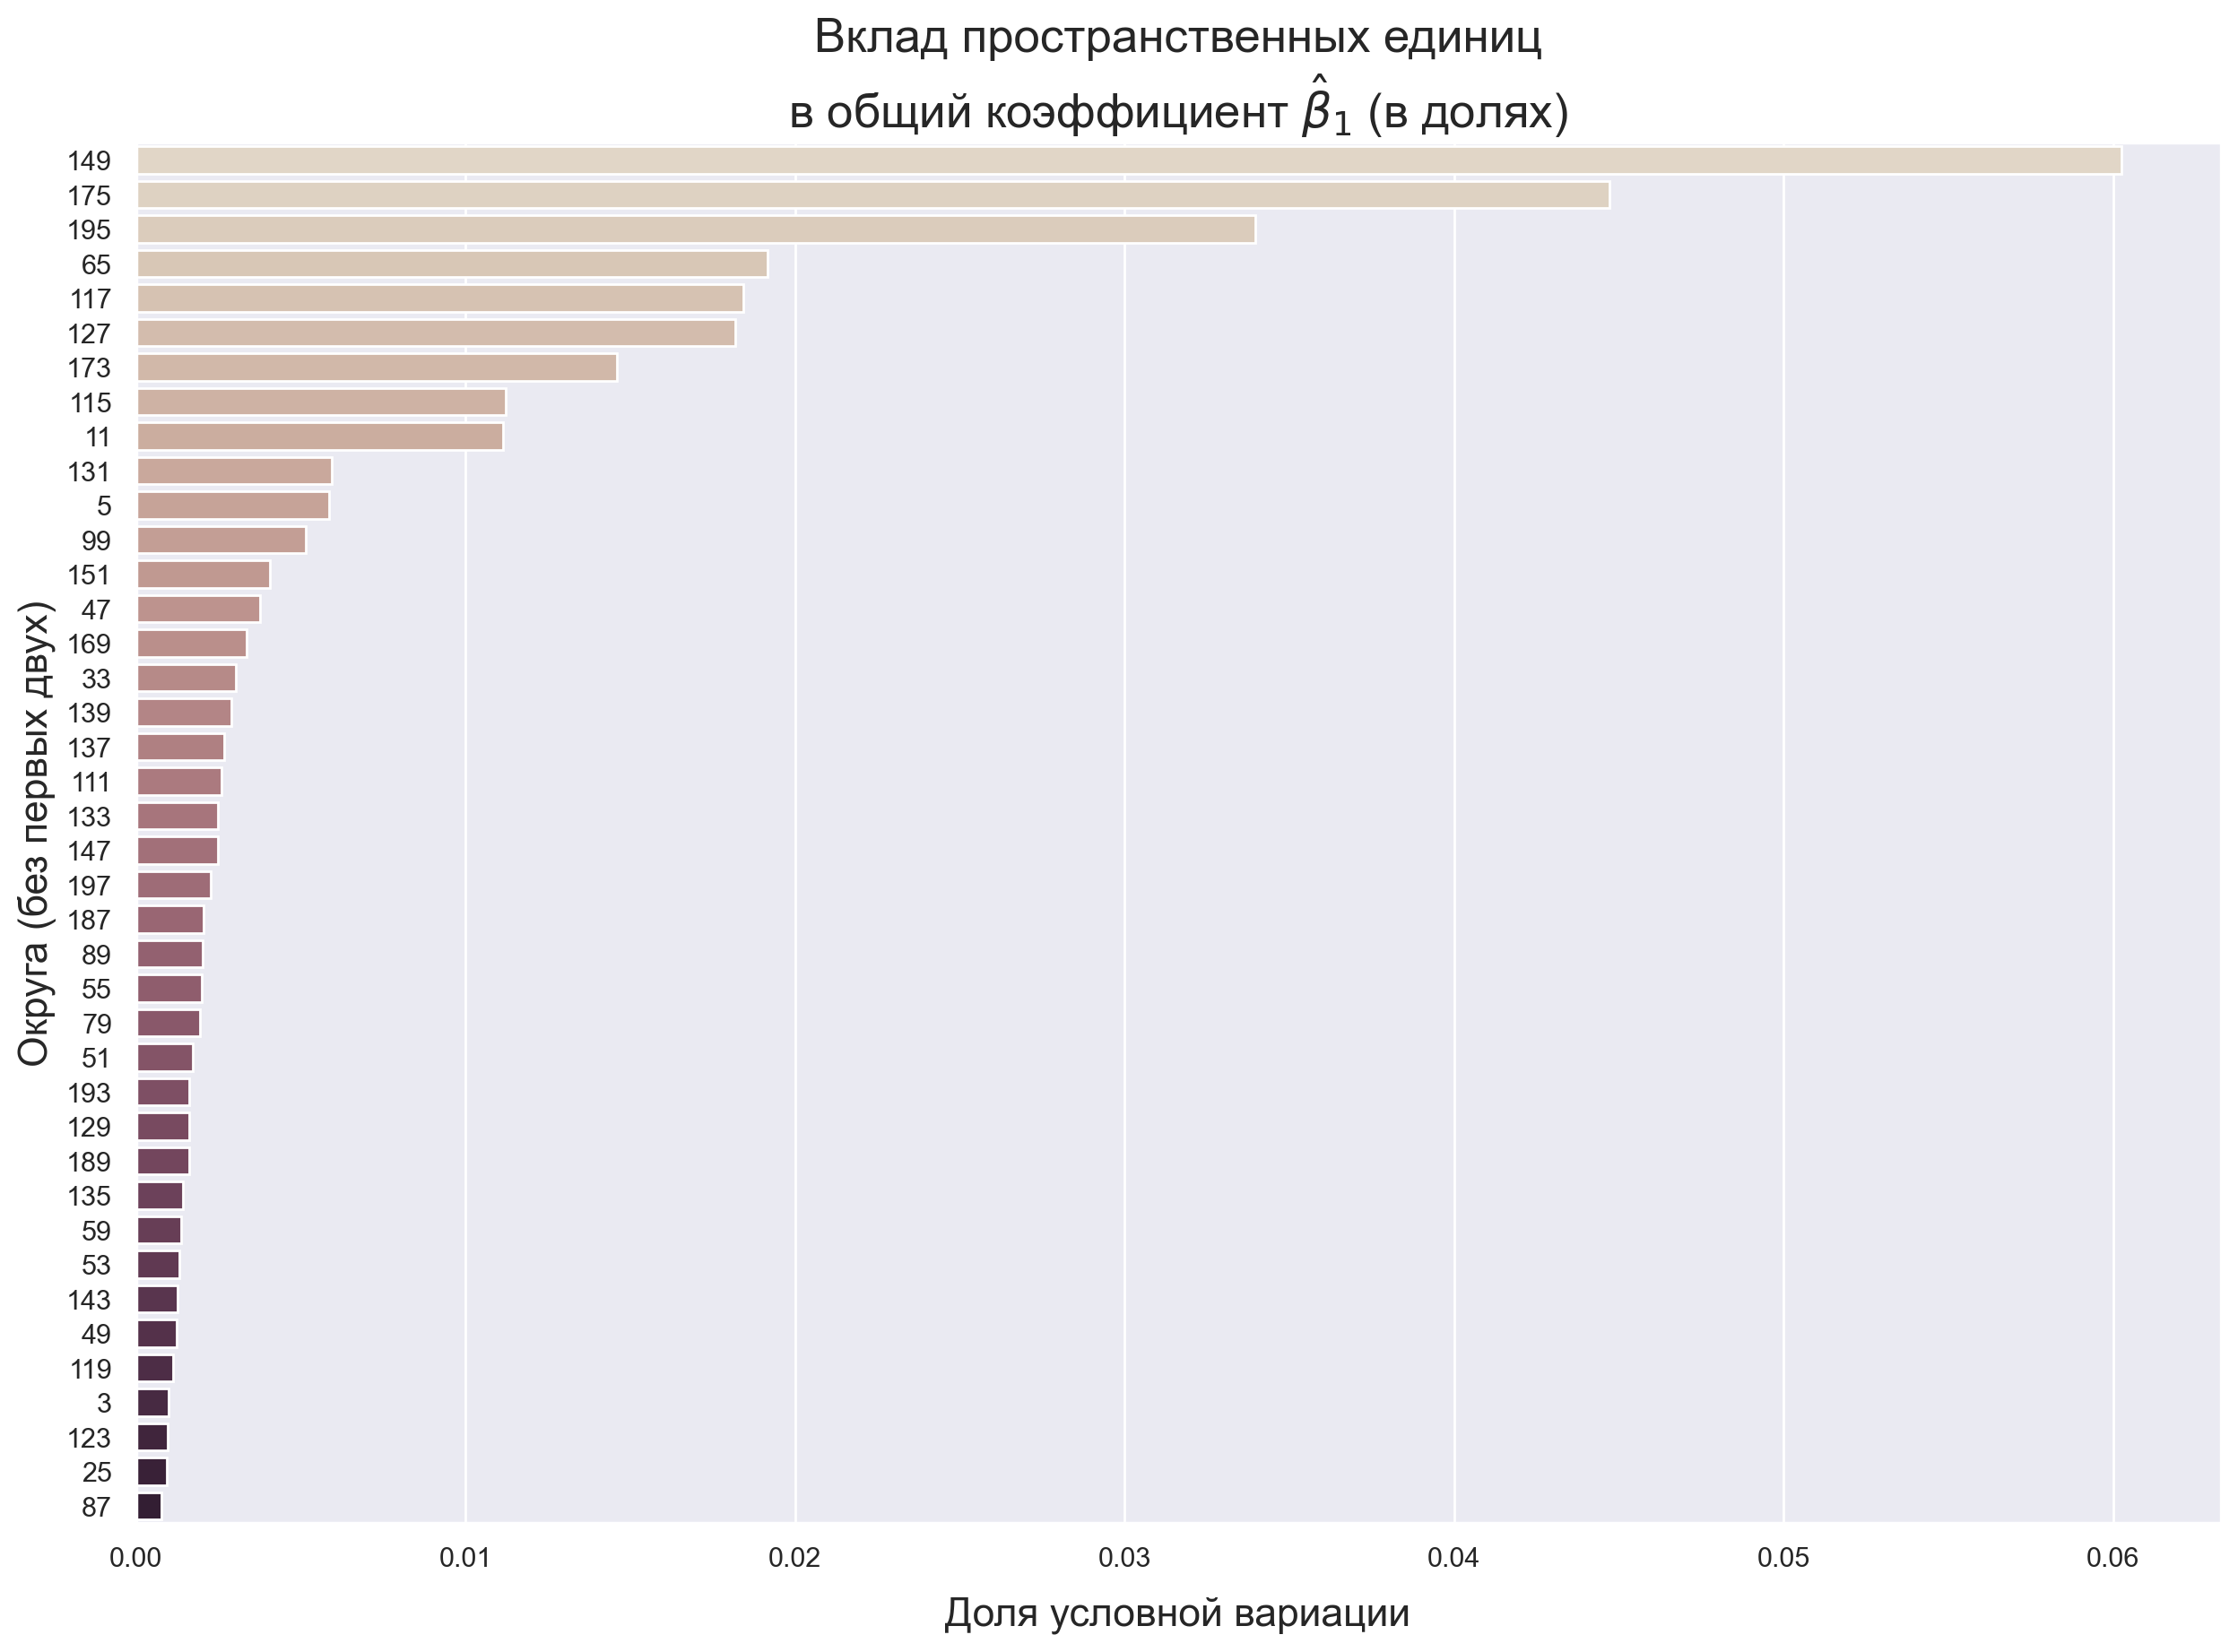

In [16]:
plot = sns.barplot(x=new_df['newvar'][2:42], y=new_df['county'][2:42], palette="ch:.25")
plot.figure.set_size_inches(15, 10)

plt.title('Вклад пространственных единиц\nв общий коэффициент $\hat{β}_1$ (в долях)', fontsize=19)
plt.xlabel('Доля условной вариации', fontsize=16, labelpad=10.0)
plt.ylabel('Округа (без первых двух)', fontsize=16)

plt.show()

In [17]:
plot.figure.savefig("fig2_2.pdf")

In [18]:
#коэф до, коэф после

In [19]:
data2 = pd.read_csv('my_df2.csv')
data2 = data2.drop('Unnamed: 0', axis=1)

In [20]:
data2['county'] = data2['county'].apply(lambda x: str(x))

In [21]:
data2 = data2.sort_values('beta', ascending=False)
counties2 = data2['county']
beta = data2['beta']

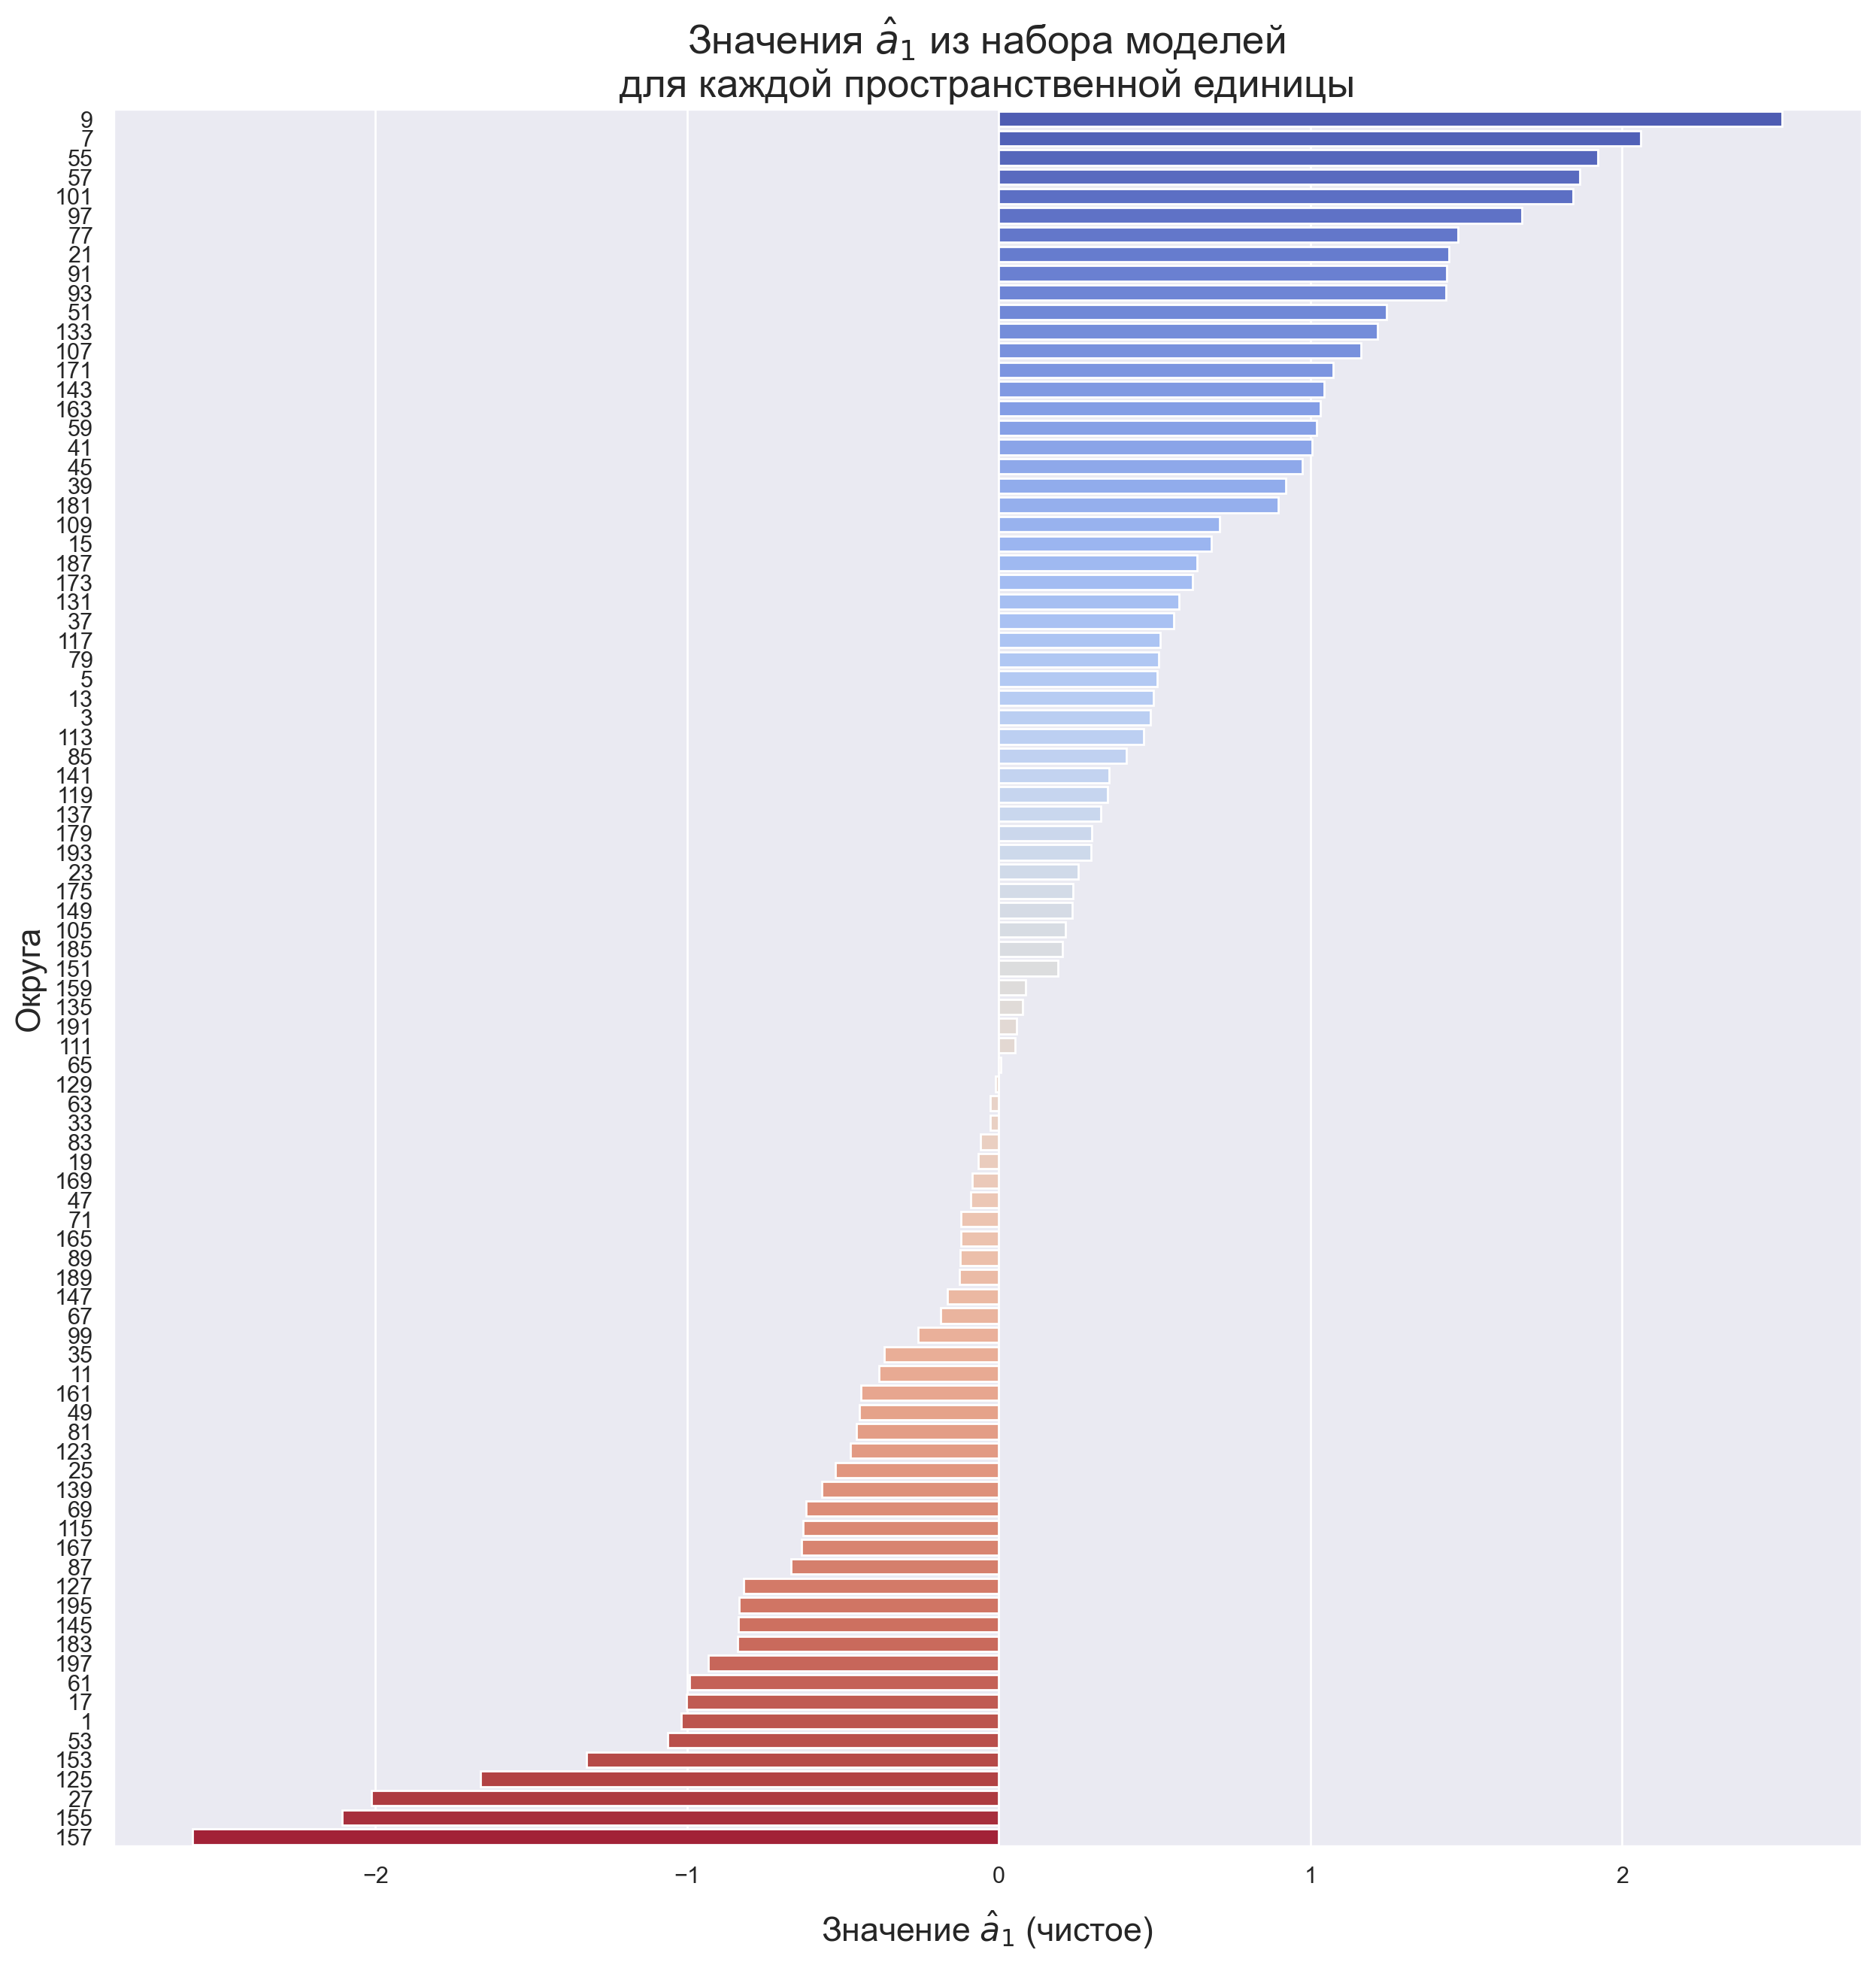

In [22]:
plot = sns.barplot(x=beta, y=counties2, palette='coolwarm')
plot.figure.set_size_inches(15, 15)

plt.title('Значения $\hat{a}_1$ из набора моделей \nдля каждой пространственной единицы', fontsize=19)
plt.xlabel('Значение $\hat{a}_1$ (чистое)', fontsize=16, labelpad=10.0)
plt.ylabel('Округа', fontsize=16)

plt.show()

In [23]:
plot.figure.savefig("fig3.pdf")

In [24]:
counties2 = data2['county']
beta2 = data2['coef']

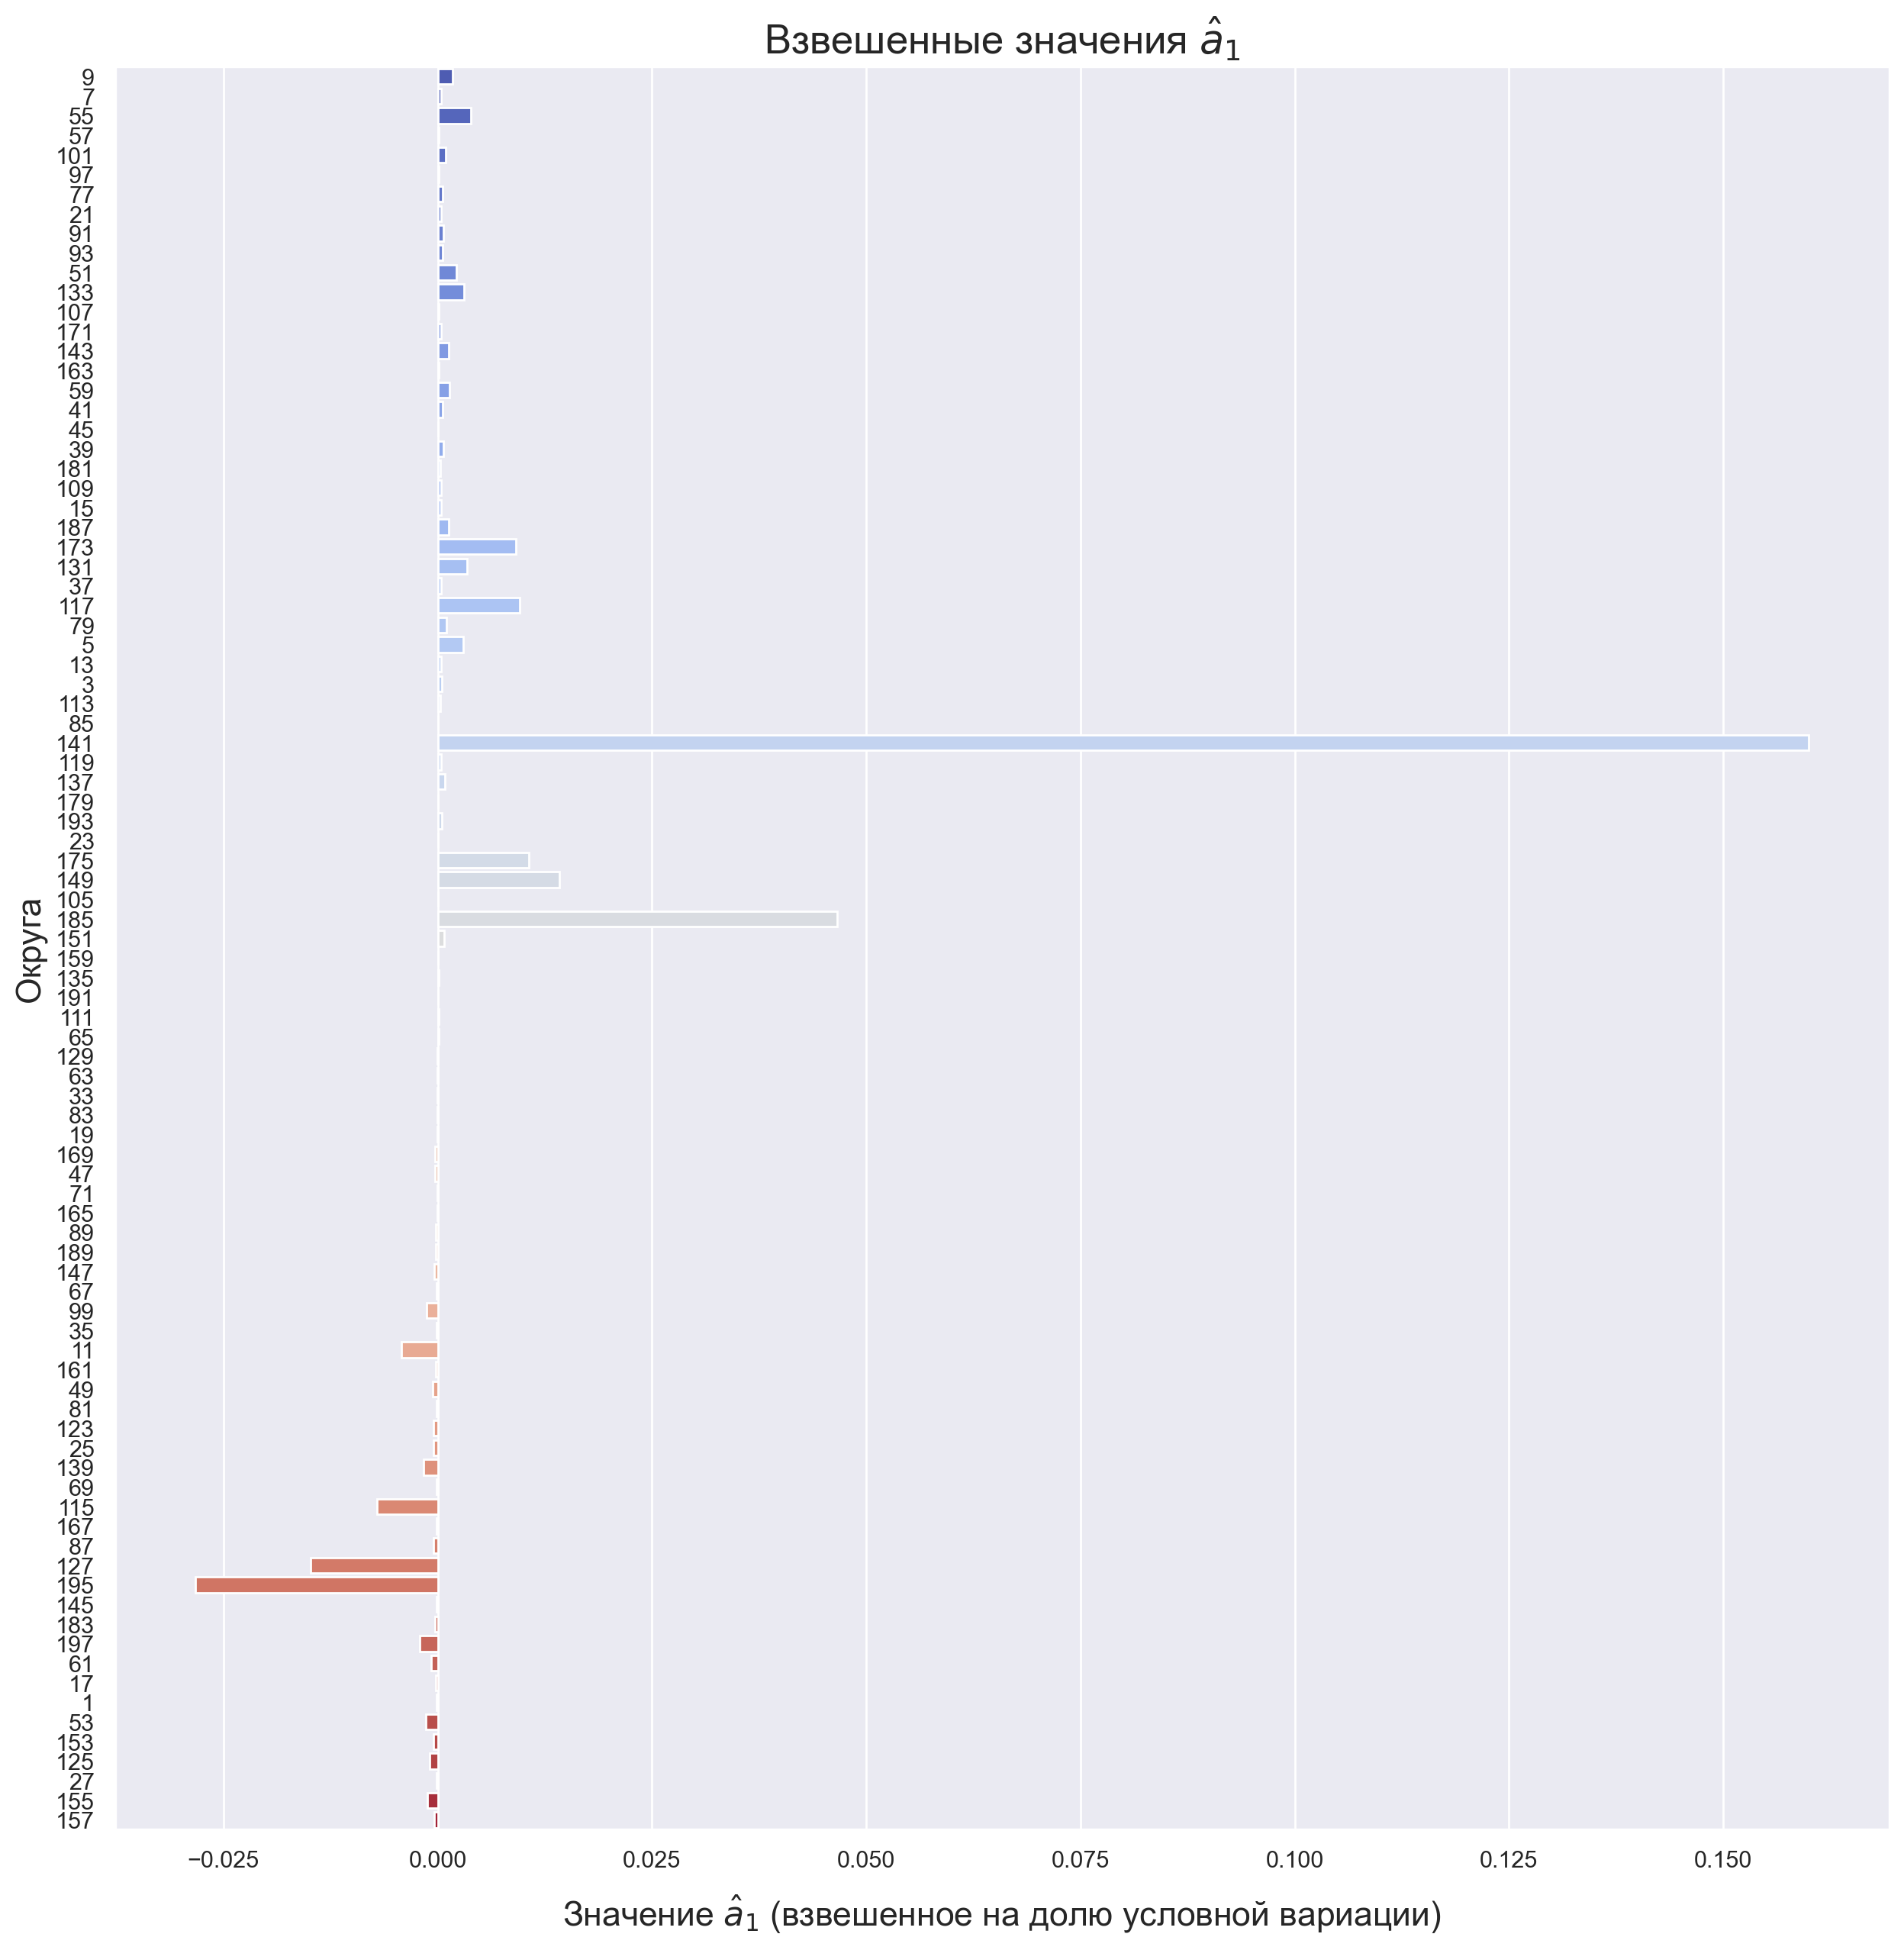

In [25]:
plot = sns.barplot(x=beta2, y=counties2, palette='coolwarm')
plot.figure.set_size_inches(15, 15)

plt.title('Взвешенные значения $\hat{a}_1$', fontsize=19)
plt.xlabel('Значение $\hat{a}_1$ (взвешенное на долю условной вариации)', fontsize=16, labelpad=10.0)
plt.ylabel('Округа', fontsize=16)

plt.show()

In [26]:
plot.figure.savefig("fig4.pdf")

In [27]:
counties2 = data2['county']
beta2 = data2['coef']

In [28]:
data3 = data2.sort_values('coef', ascending=False)

counties3 = data3['county']
beta3 = data3['coef']

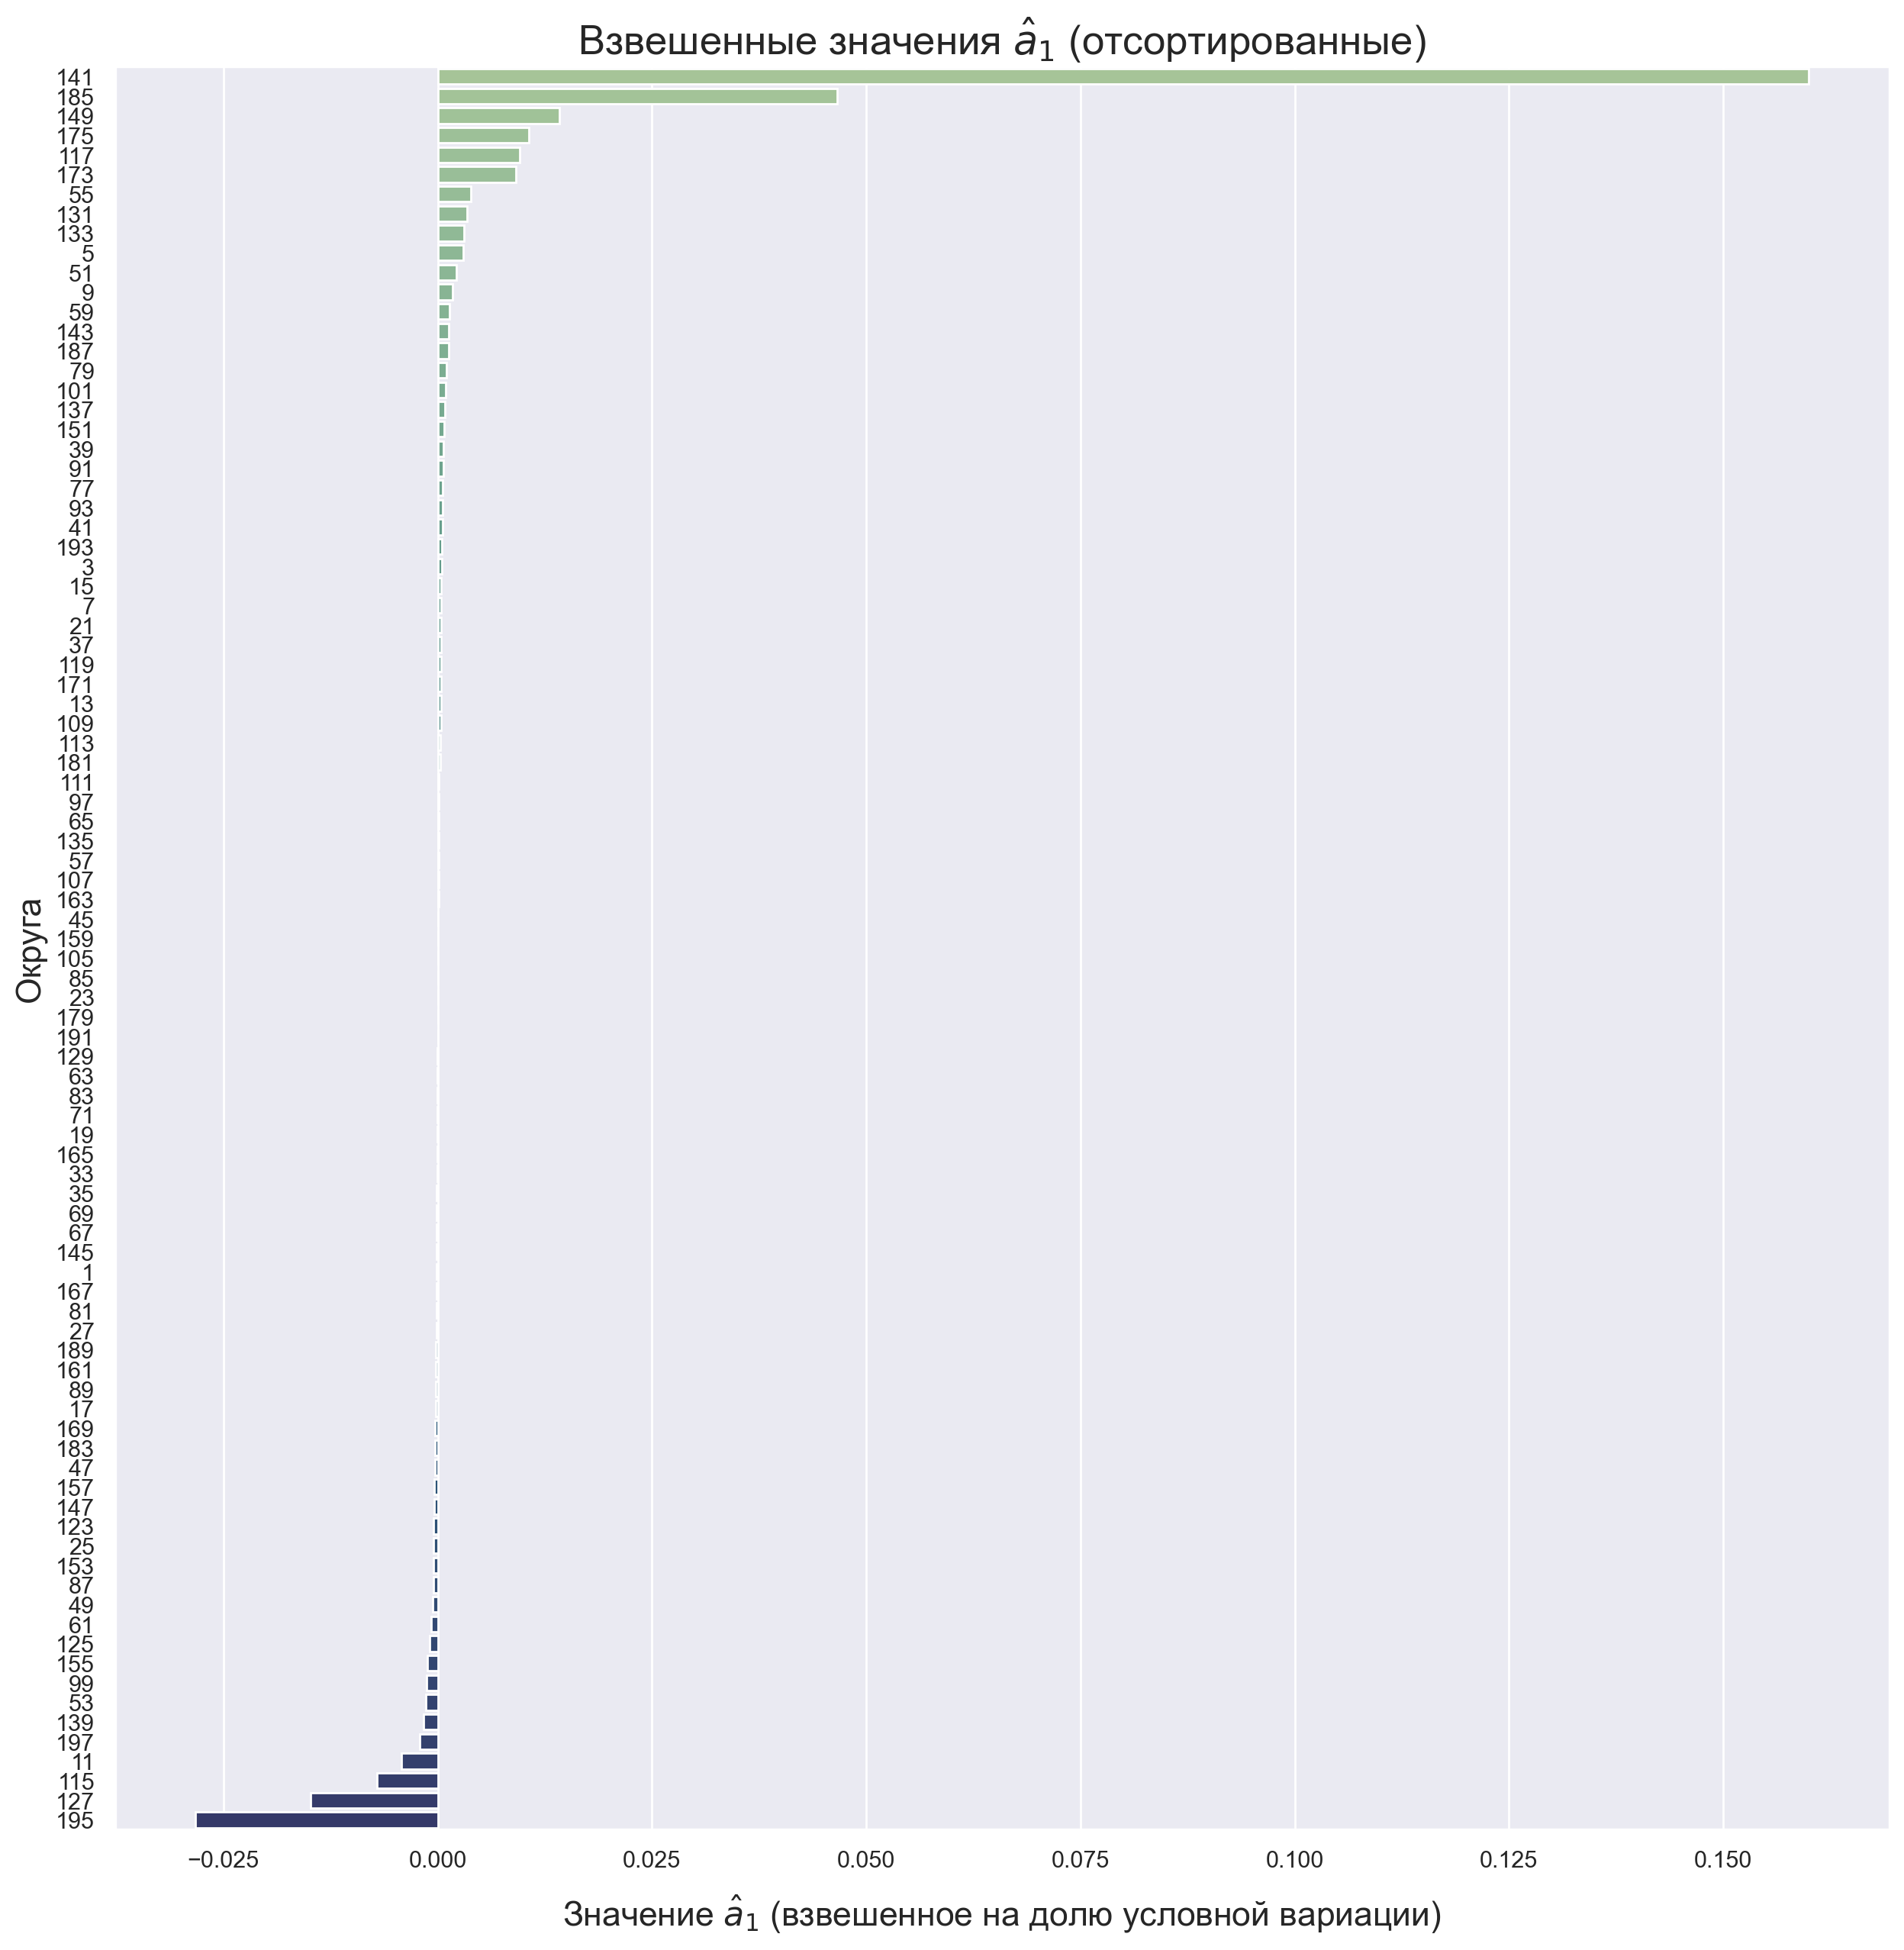

In [29]:
plot = sns.barplot(x=beta3, y=counties3, palette='crest')
plot.figure.set_size_inches(15, 15)

plt.title('Взвешенные значения $\hat{a}_1$ (отсортированные)', fontsize=19)
plt.xlabel('Значение $\hat{a}_1$ (взвешенное на долю условной вариации)', fontsize=16, labelpad=10.0)
plt.ylabel('Округа', fontsize=16)

plt.show()

In [30]:
plot.figure.savefig("fig5.pdf")

In [31]:
sum(beta2)

0.2131732781708451

In [32]:
# MULTIVARIABLE

In [33]:
data4 = pd.read_csv('my_df3.csv')
data4 = data4.drop('Unnamed: 0', axis=1)

In [34]:
data4

,county,var(x_clear)
0,1,0.000813
1,3,0.005022
2,5,0.037257
3,7,0.001168
4,9,0.003687
...,...,...
85,189,0.009930
86,191,0.000940
87,193,0.009053
88,195,0.215462


In [35]:
data4 = data4.sort_values('var(x_clear)', ascending=False)
data4

,county,var(x_clear)
62,141,2.895605
83,185,1.492456
66,149,0.414273
79,175,0.290664
88,195,0.215462
...,...,...
37,85,0.000483
13,27,0.000481
82,183,0.000466
64,145,0.000334


In [36]:
data4['county'] = data4['county'].apply(lambda x: str(x))

In [37]:
dataset_3 = data4[data4['var(x_clear)'] > 0.005]
dataset_4 = data4[data4['var(x_clear)'] <= 0.005]

In [38]:
len(dataset_3), len(dataset_4)

(43, 47)

In [39]:
counties = dataset_3['county']
variation = dataset_3['var(x_clear)']

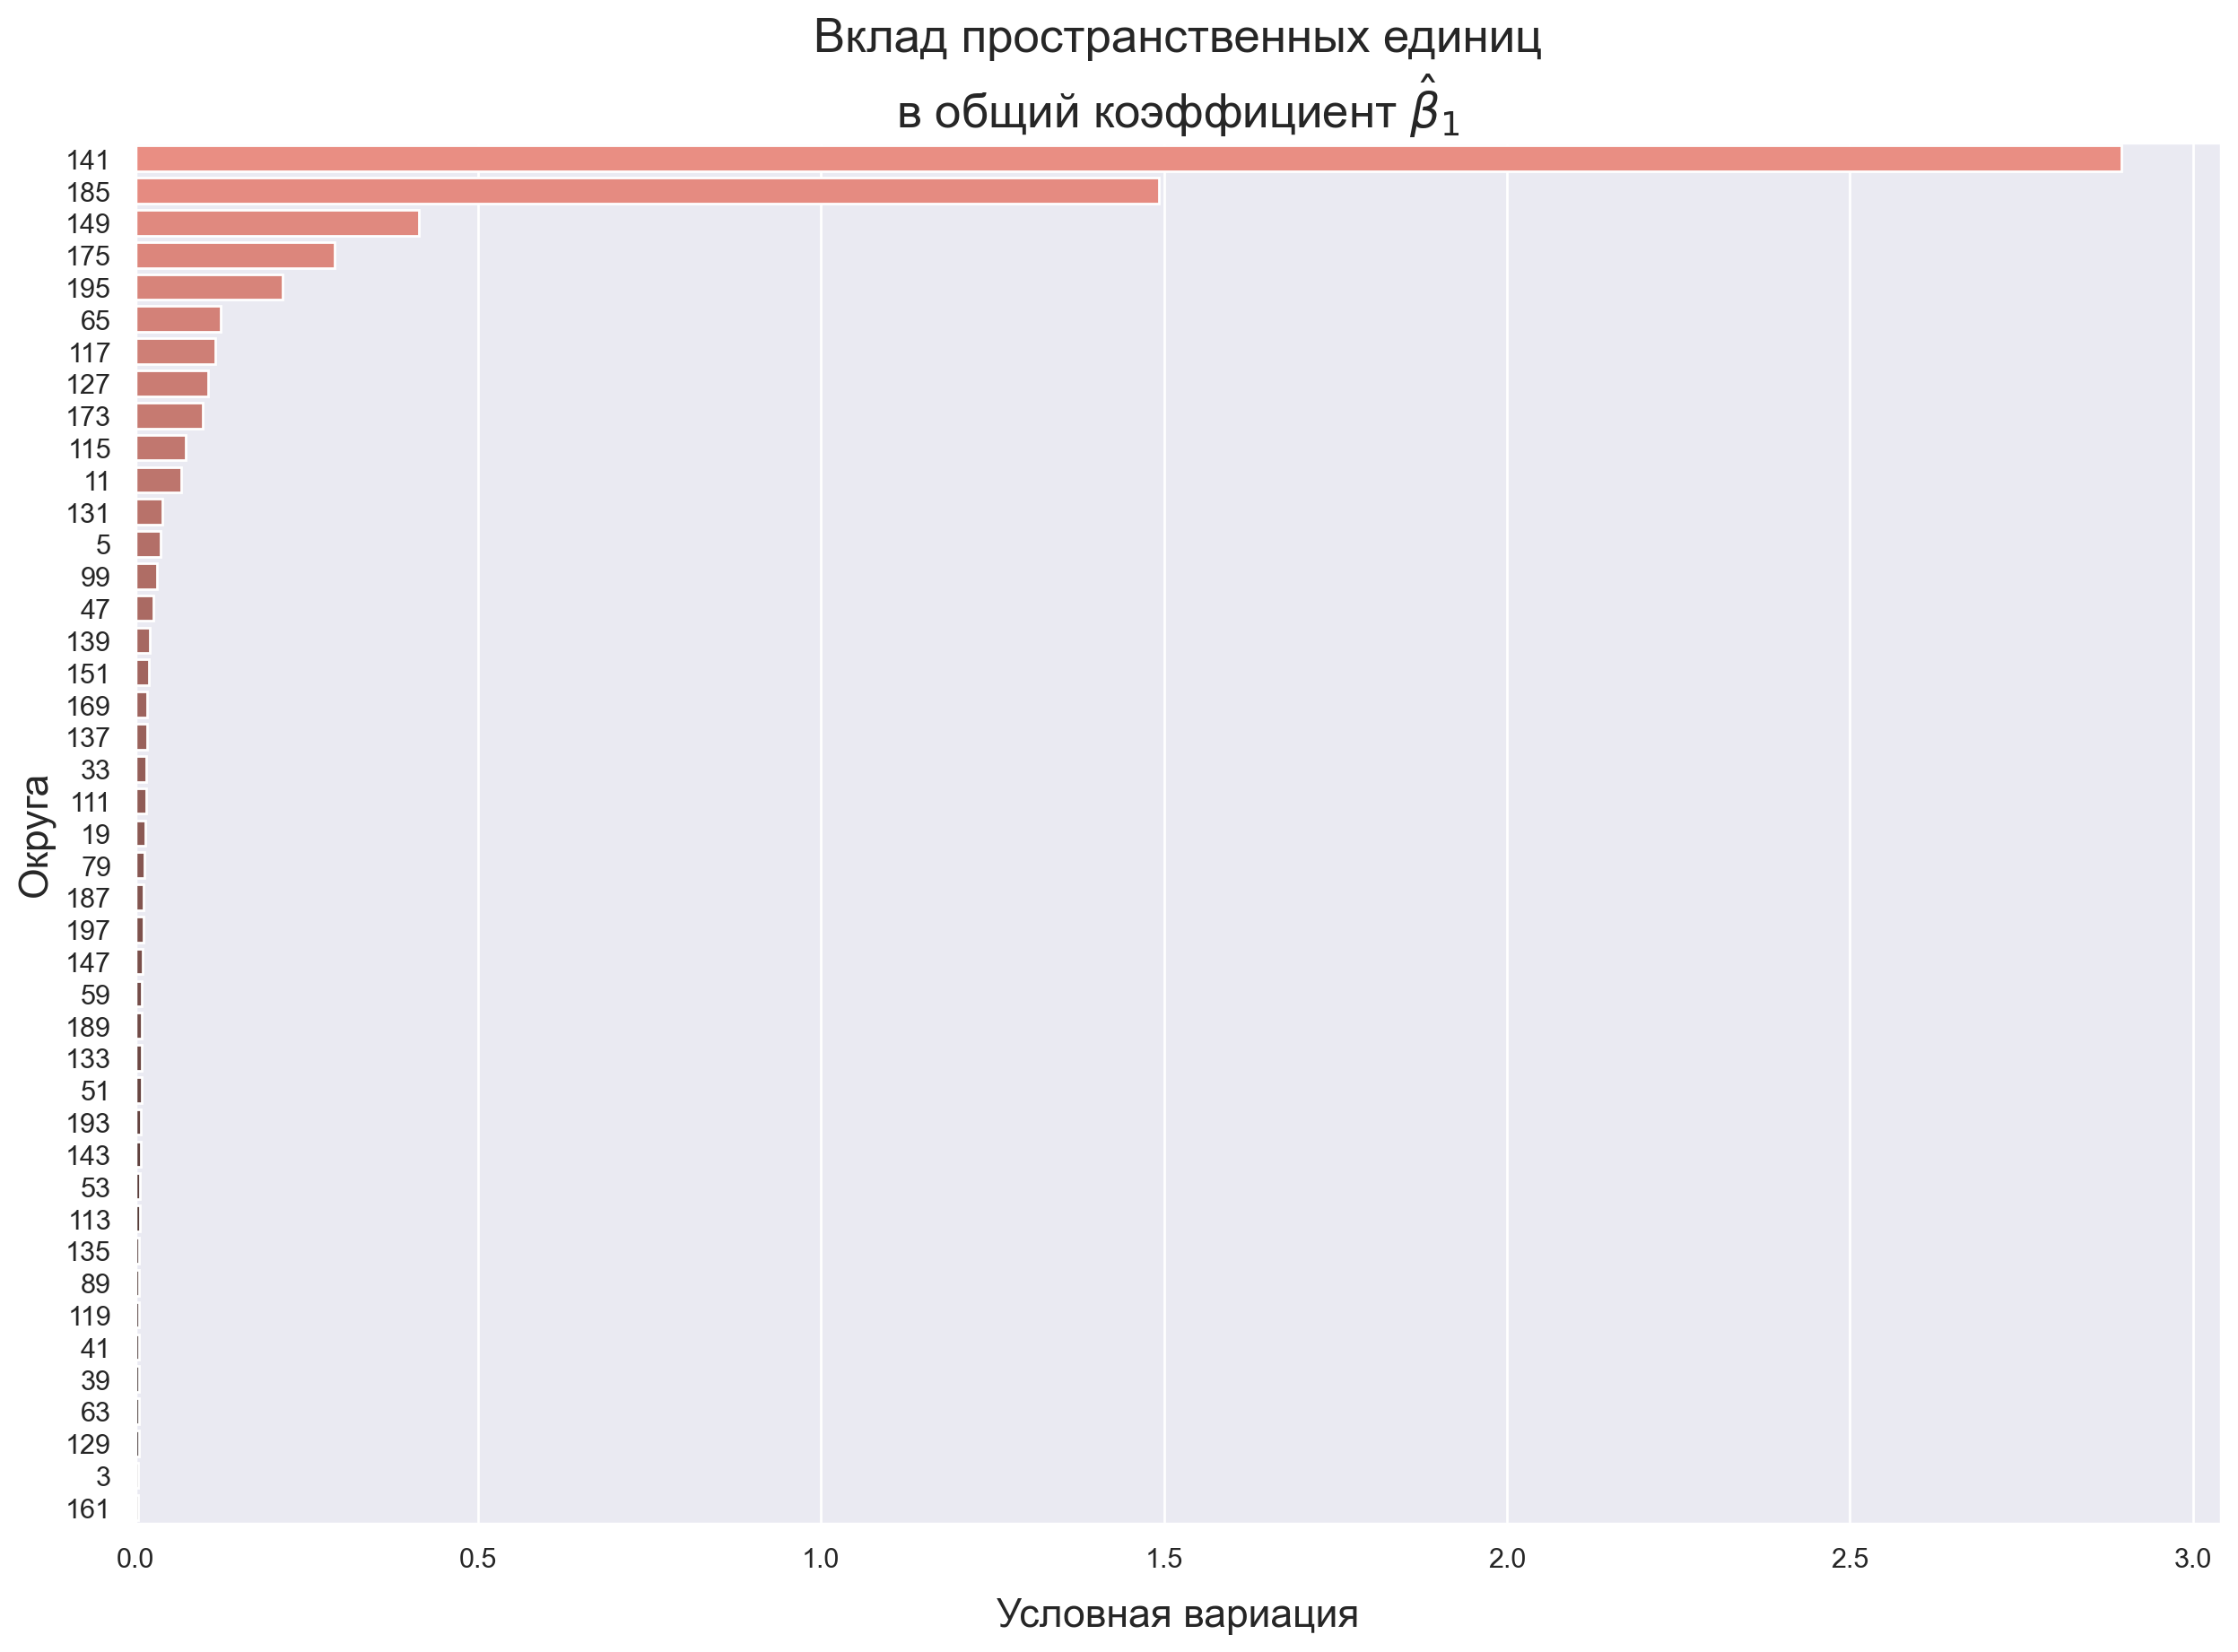

In [40]:
plot = sns.barplot(x=variation, y=counties, palette="dark:salmon_r")
plot.figure.set_size_inches(15, 10)

plt.title('Вклад пространственных единиц\nв общий коэффициент $\hat{β}_1$', fontsize=19)
plt.xlabel('Условная вариация', fontsize=16, labelpad=10.0)
plt.ylabel('Округа', fontsize=16)

plt.show()

In [41]:
plot.figure.savefig("fig6.pdf")

In [42]:
const = sum(data4['var(x_clear)'])

new_df2 = data4.copy()
new_df2['newvar'] = new_df2['var(x_clear)'] / const

In [43]:
sum(new_df2['newvar'][:10])

0.9071023393325219

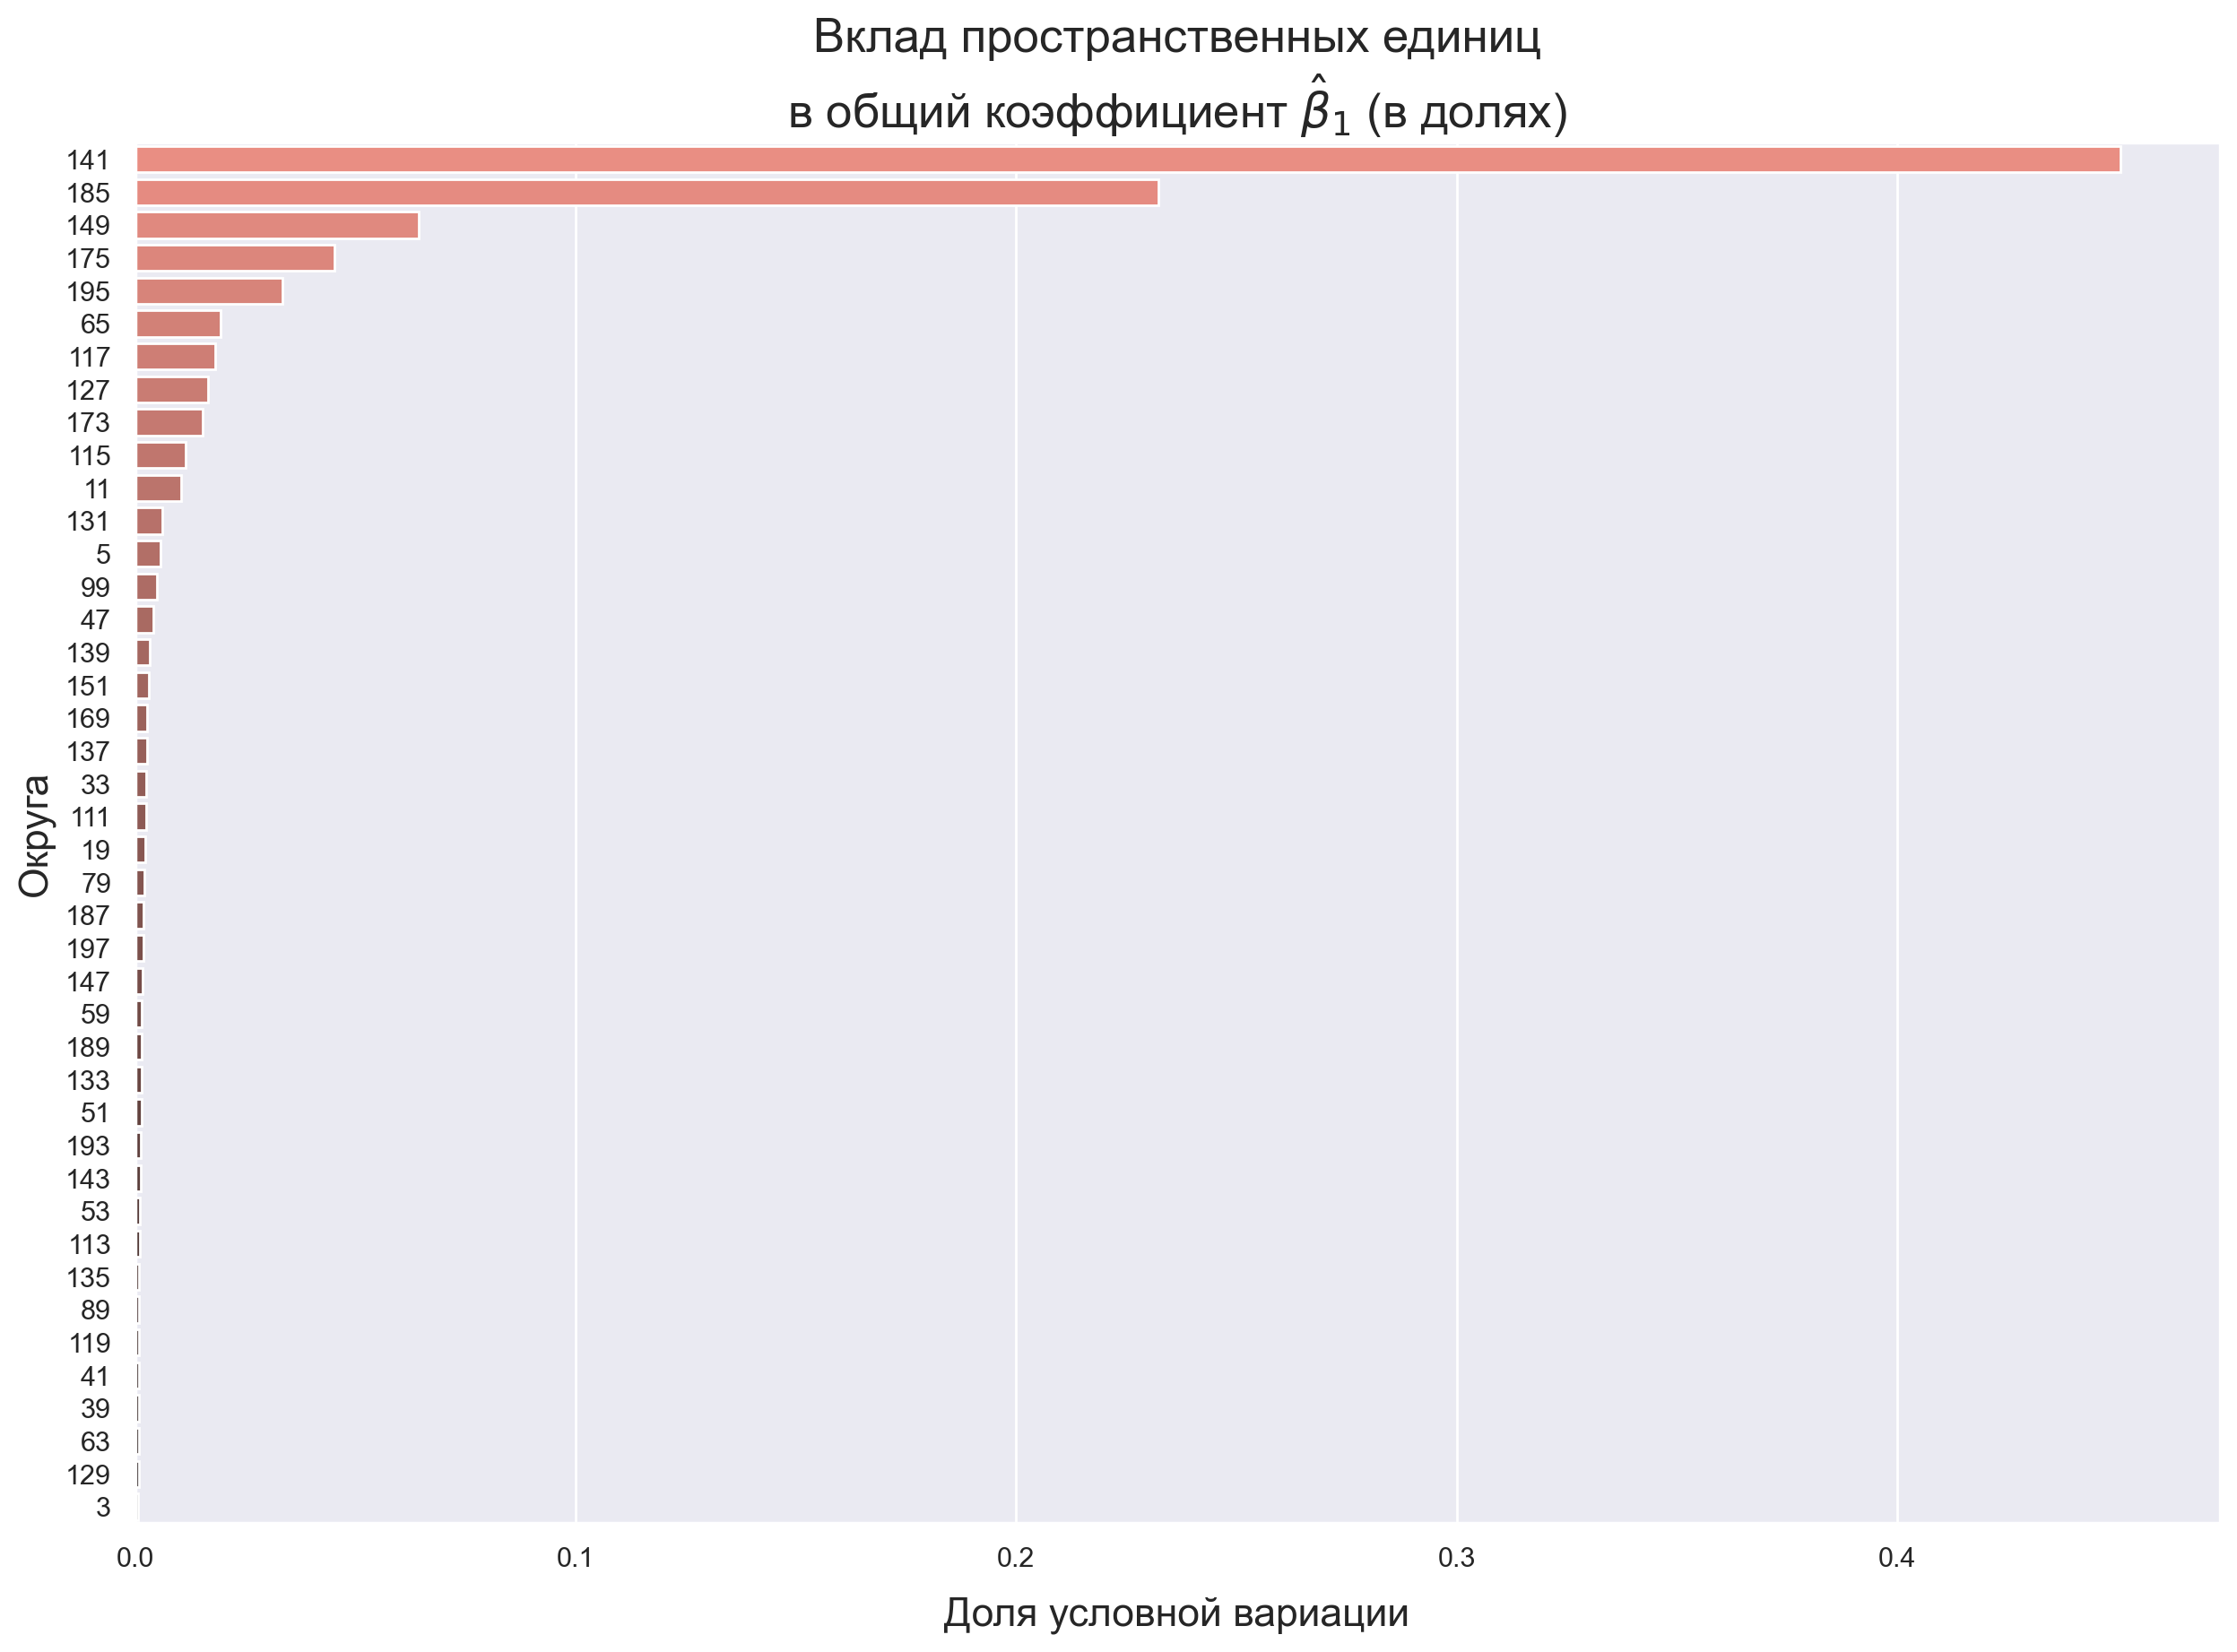

In [44]:
plot = sns.barplot(x=new_df2['newvar'][:42], y=new_df2['county'][:42], palette="dark:salmon_r")
plot.figure.set_size_inches(15, 10)

plt.title('Вклад пространственных единиц\nв общий коэффициент $\hat{β}_1$ (в долях)', fontsize=19)
plt.xlabel('Доля условной вариации', fontsize=16, labelpad=10.0)
plt.ylabel('Округа', fontsize=16)

plt.show()

In [45]:
plot.figure.savefig("fig7_1.pdf")

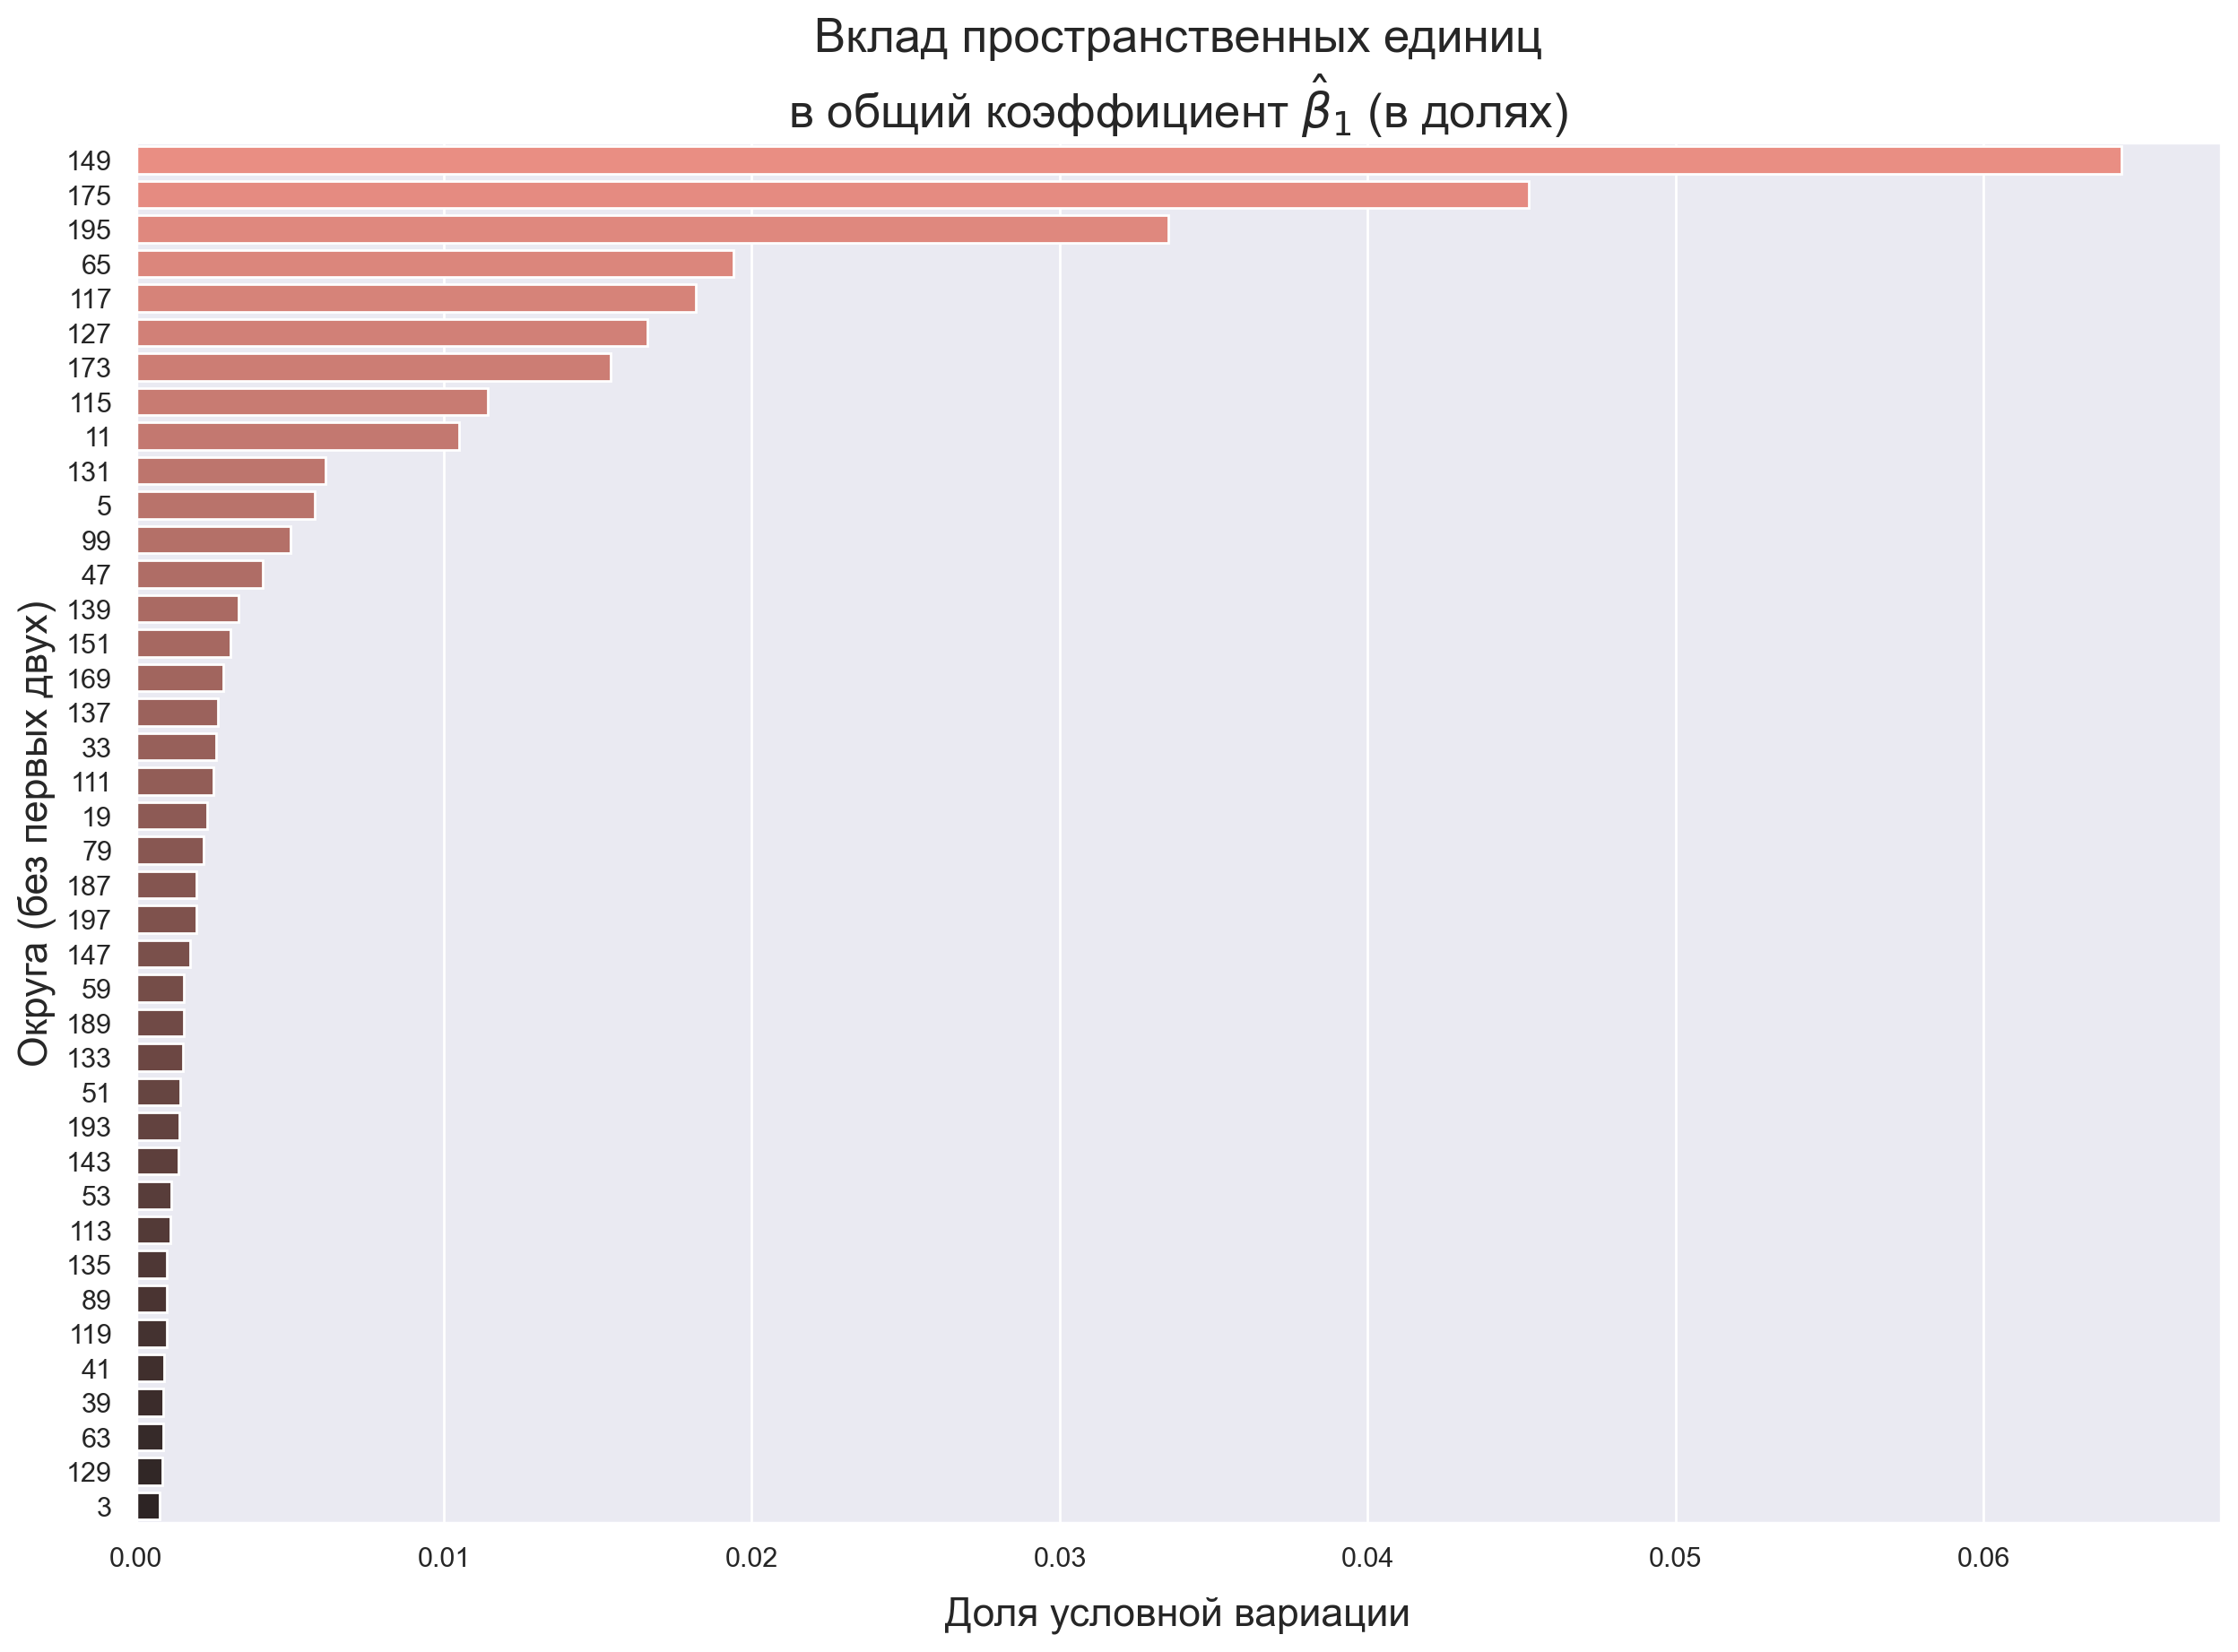

In [46]:
plot = sns.barplot(x=new_df2['newvar'][2:42], y=new_df2['county'][2:42], palette="dark:salmon_r")
plot.figure.set_size_inches(15, 10)

plt.title('Вклад пространственных единиц\nв общий коэффициент $\hat{β}_1$ (в долях)', fontsize=19)
plt.xlabel('Доля условной вариации', fontsize=16, labelpad=10.0)
plt.ylabel('Округа (без первых двух)', fontsize=16)

plt.show()

In [47]:
plot.figure.savefig("fig7_2.pdf")

In [48]:
data5 = pd.read_csv('my_df4.csv')
data5 = data5.drop('Unnamed: 0', axis=1)

In [49]:
data5['county'] = data5['county'].apply(lambda x: str(x))

In [50]:
data5 = data5.sort_values('beta', ascending=False)
counties2 = data5['county']
beta = data5['beta']

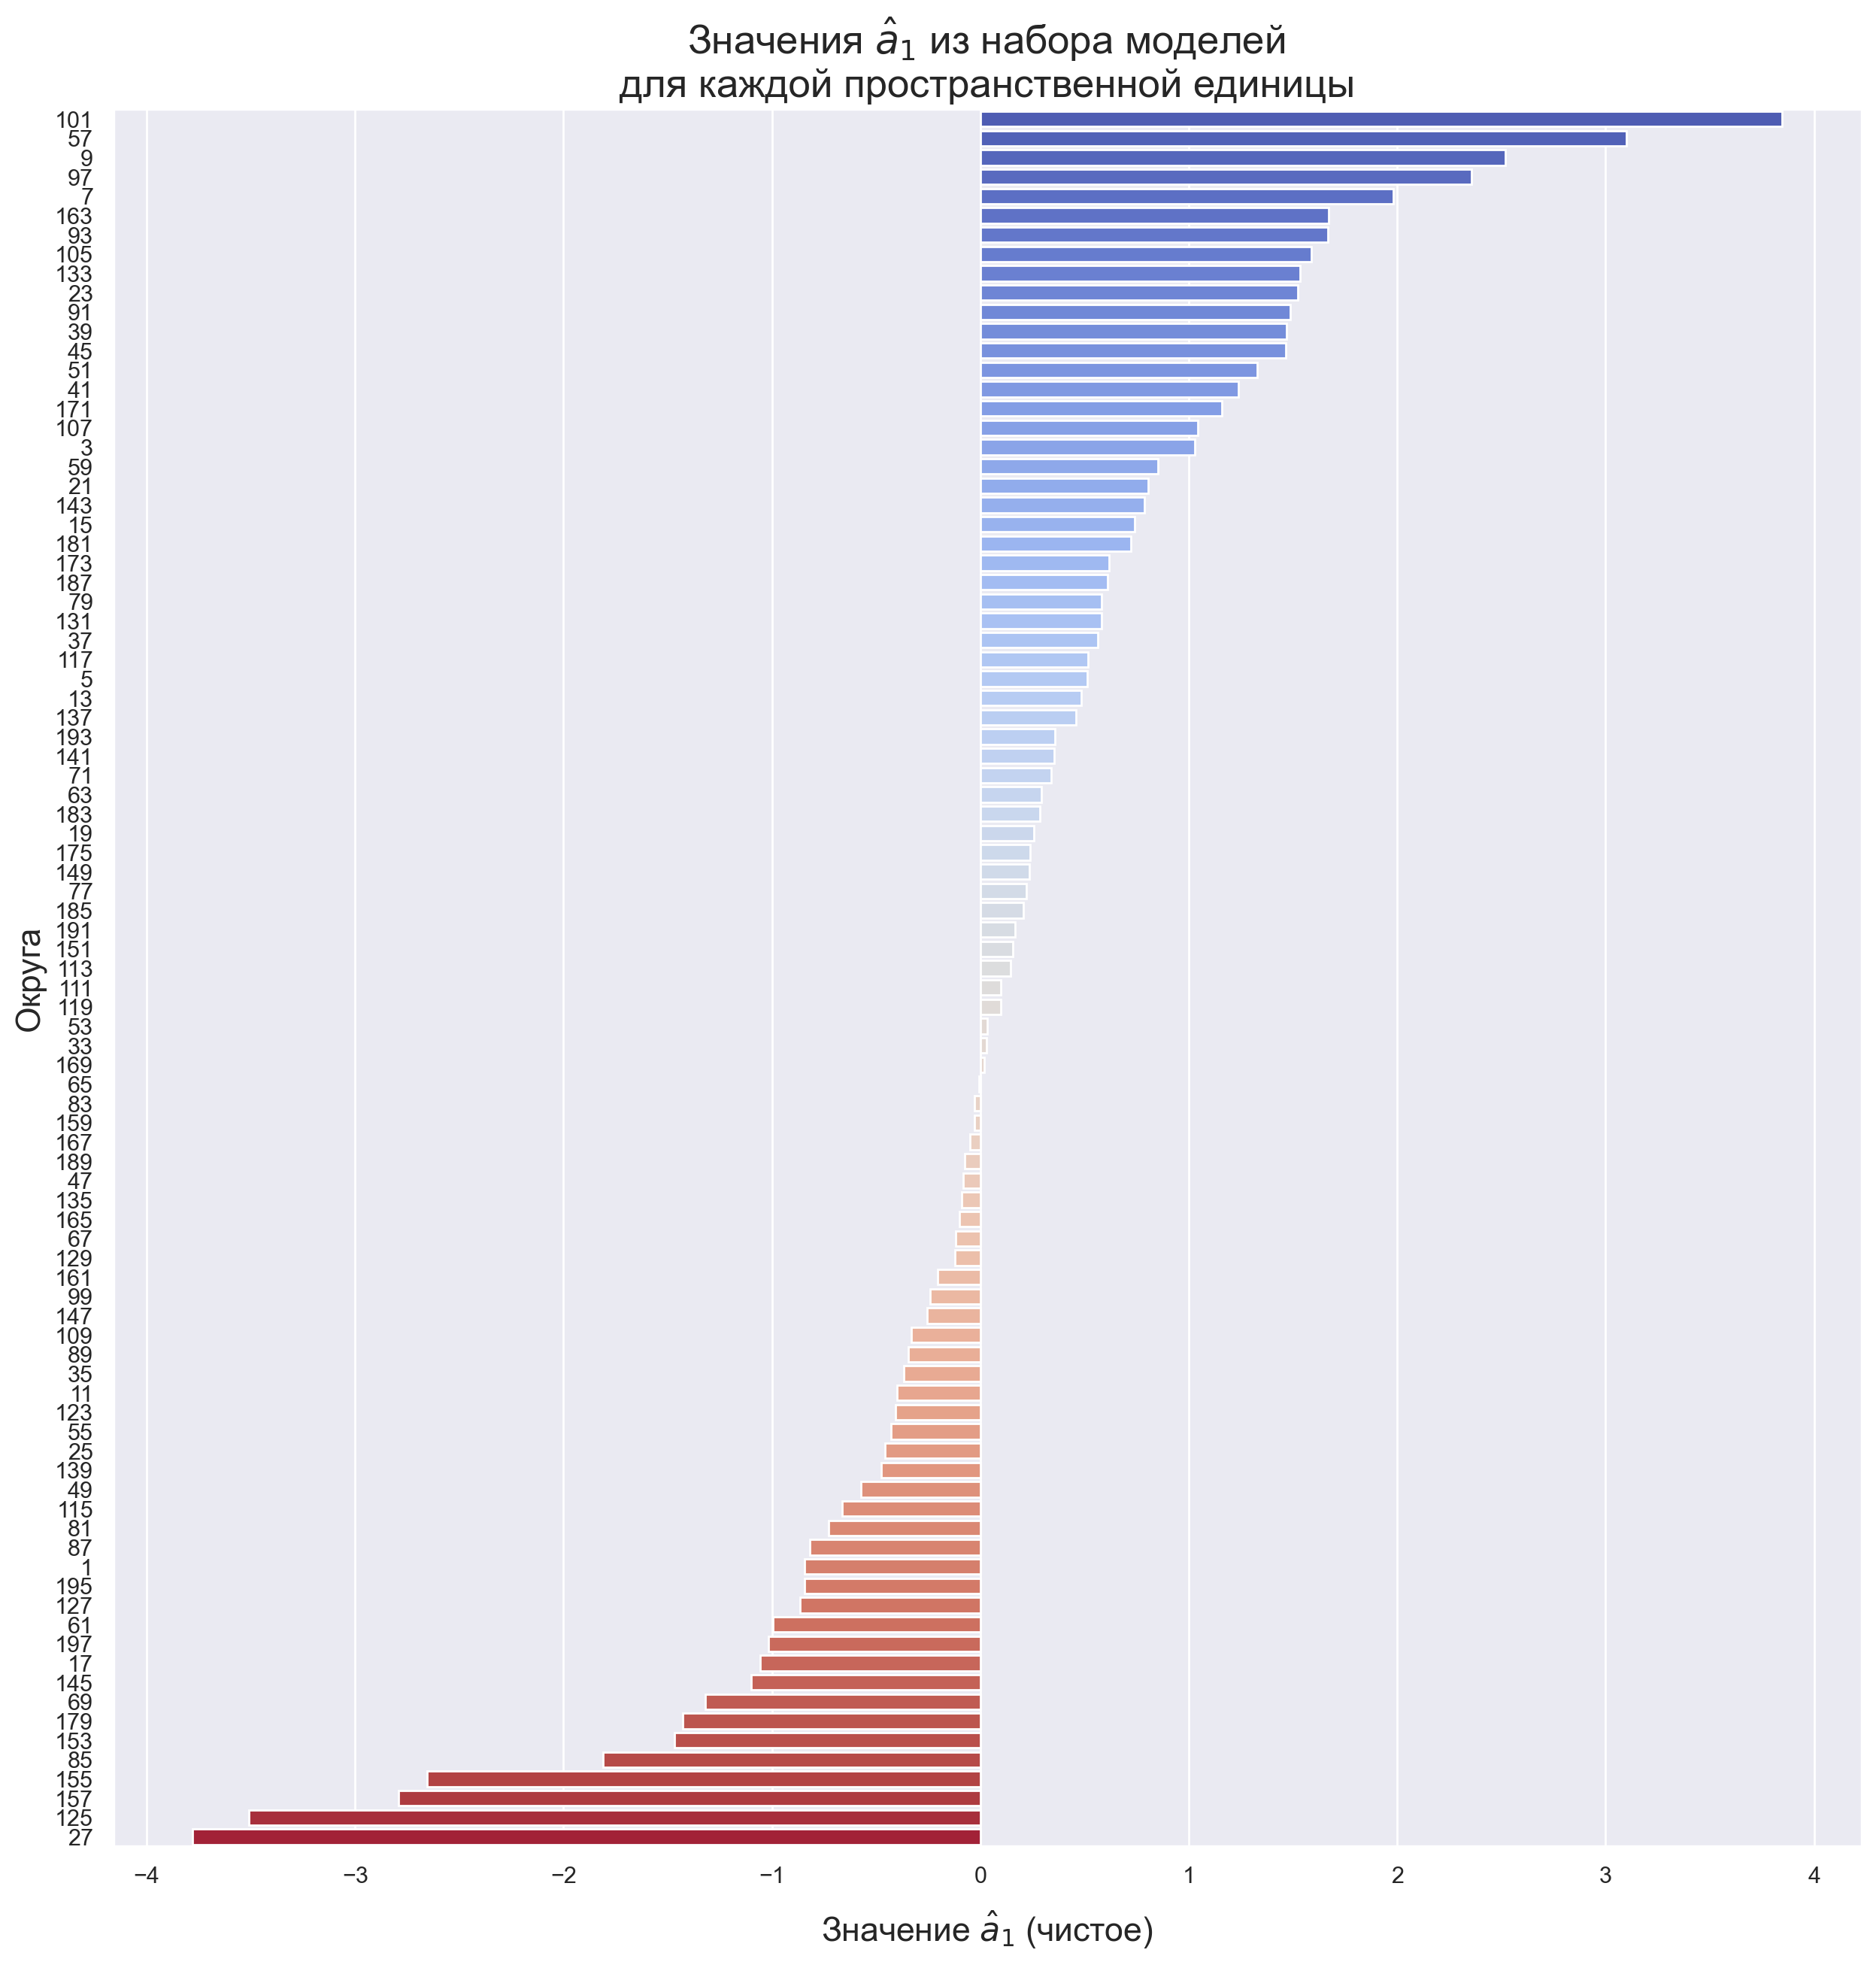

In [51]:
plot = sns.barplot(x=beta, y=counties2, palette='coolwarm')
plot.figure.set_size_inches(15, 15)

plt.title('Значения $\hat{a}_1$ из набора моделей \nдля каждой пространственной единицы', fontsize=19)
plt.xlabel('Значение $\hat{a}_1$ (чистое)', fontsize=16, labelpad=10.0)
plt.ylabel('Округа', fontsize=16)

plt.show()

In [52]:
plot.figure.savefig("fig8.pdf")

In [53]:
counties2 = data5['county']
beta2 = data5['coef']

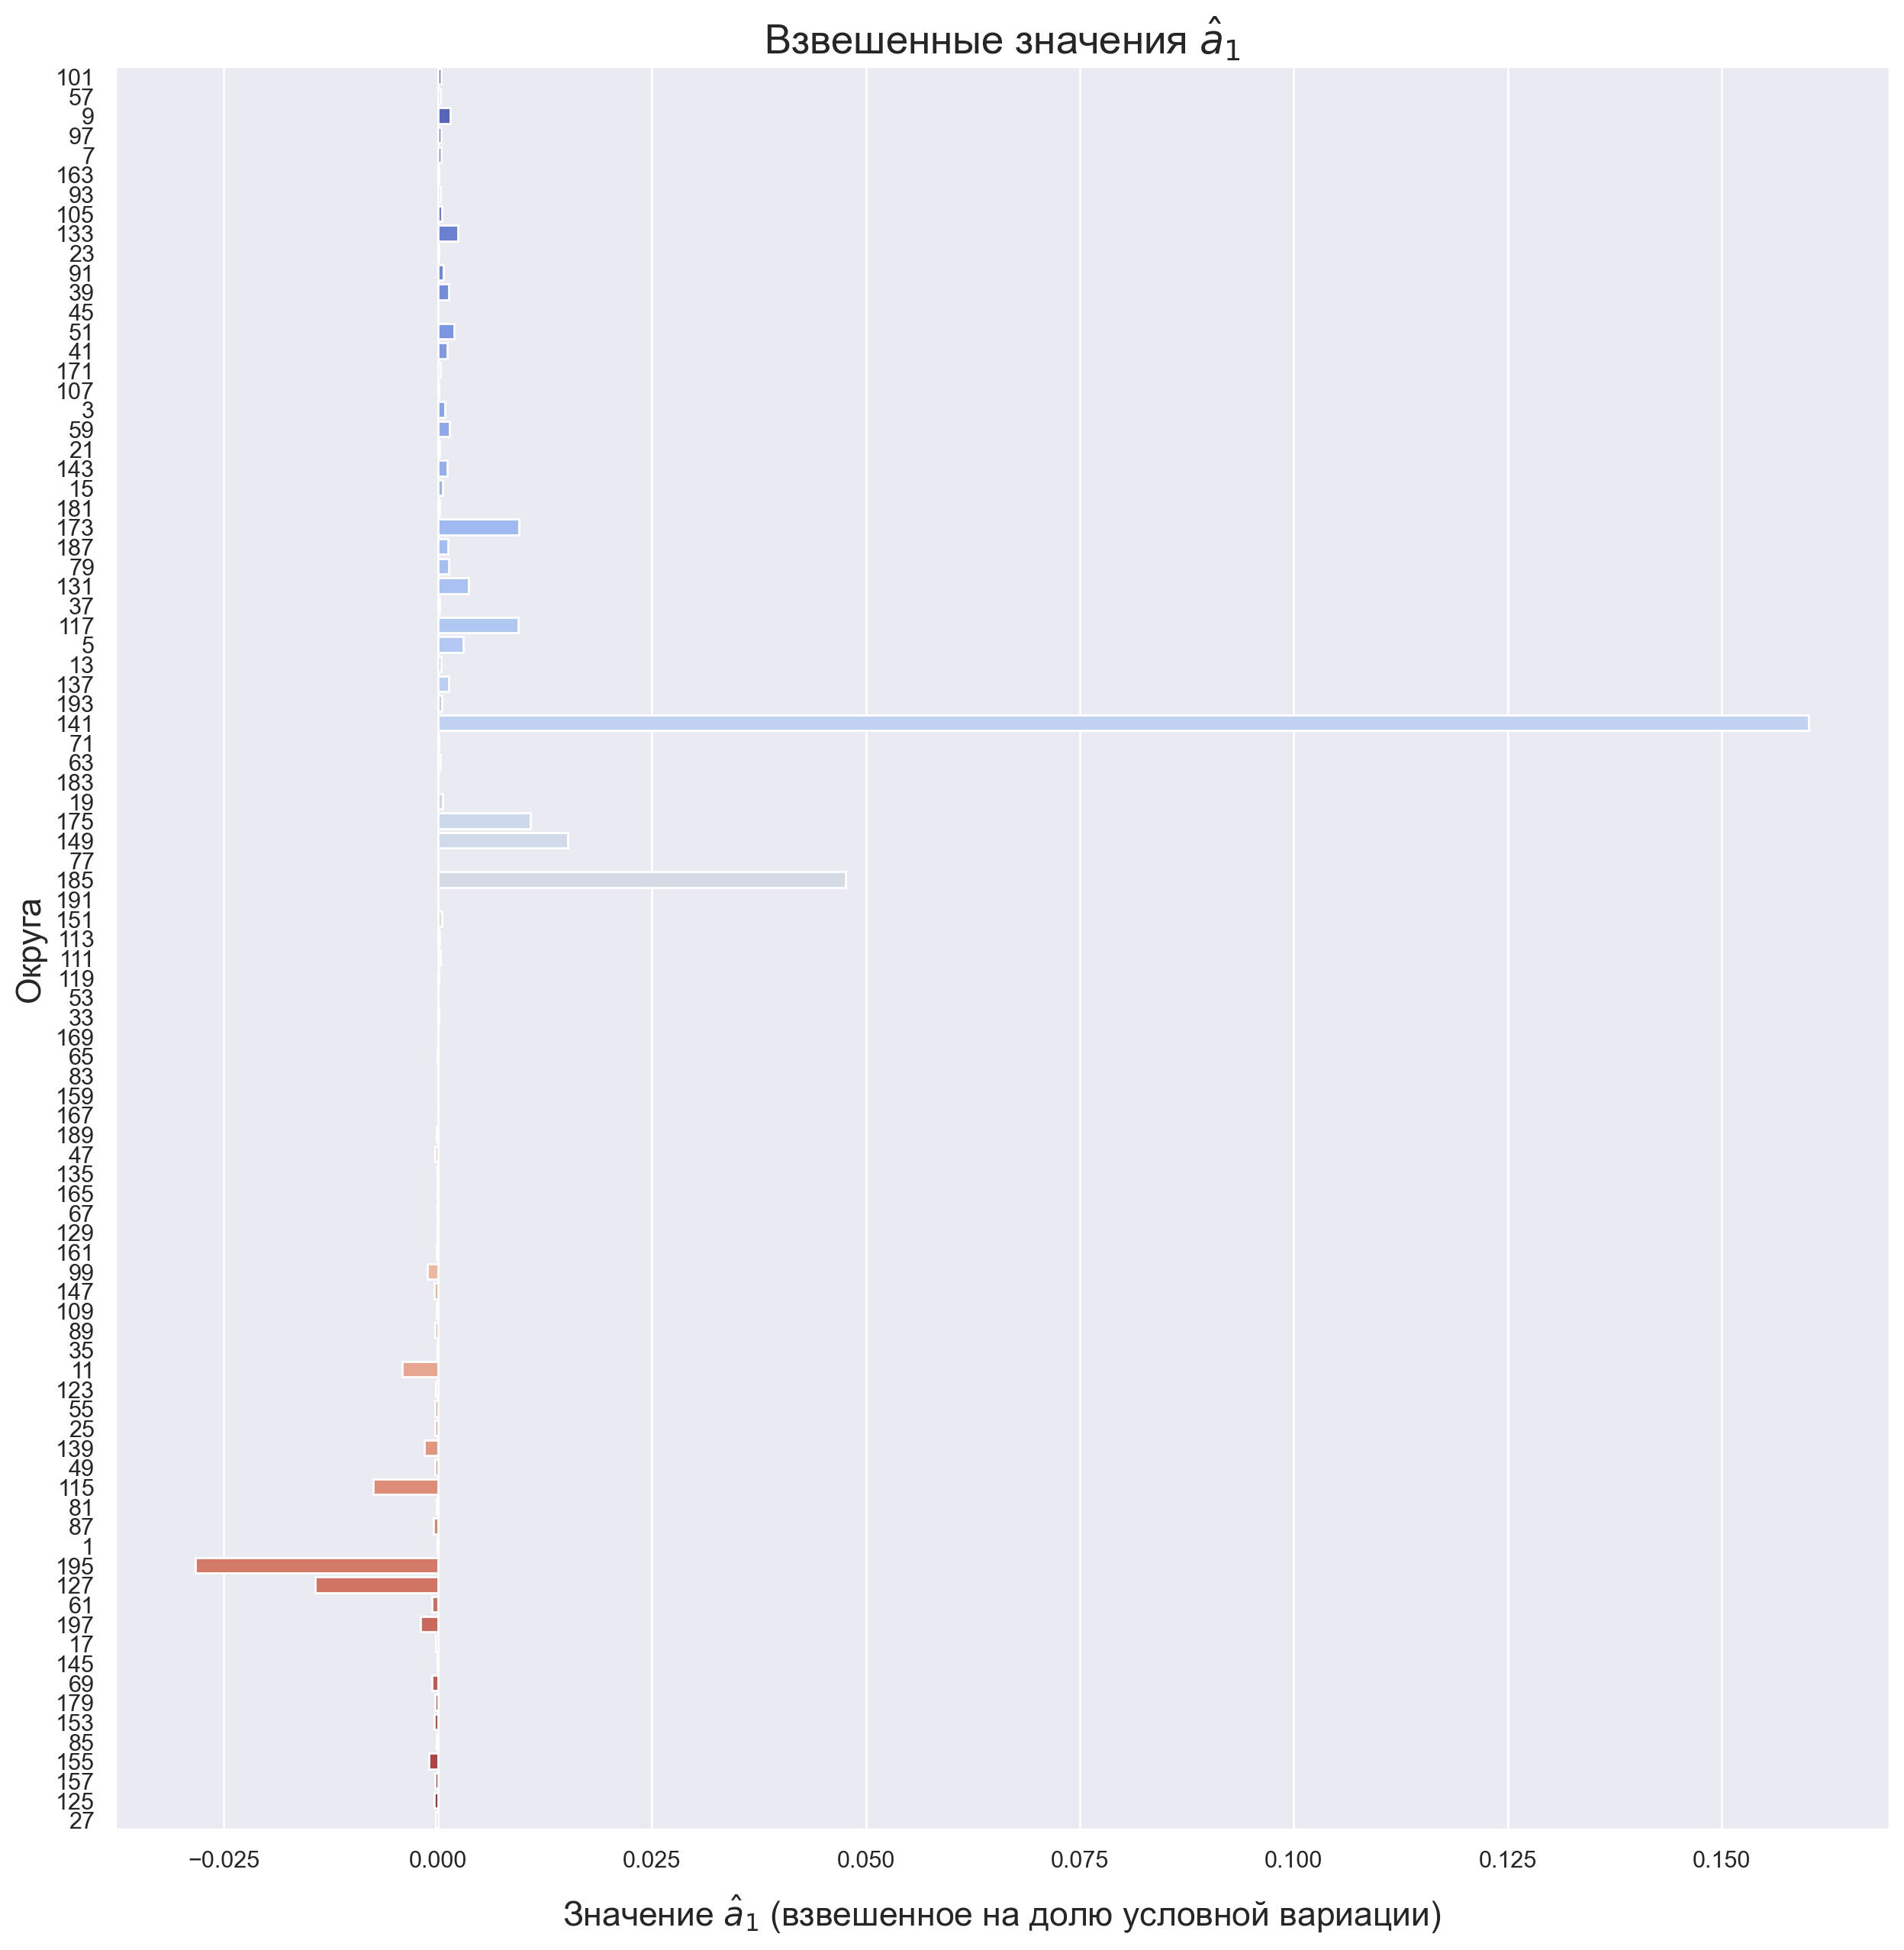

In [54]:
plot = sns.barplot(x=beta2, y=counties2, palette='coolwarm')
plot.figure.set_size_inches(15, 15)

plt.title('Взвешенные значения $\hat{a}_1$', fontsize=19)
plt.xlabel('Значение $\hat{a}_1$ (взвешенное на долю условной вариации)', fontsize=16, labelpad=10.0)
plt.ylabel('Округа', fontsize=16)

plt.show()

In [55]:
plot.figure.savefig("fig9.pdf")

In [56]:
counties2 = data5['county']
beta2 = data5['coef']

In [57]:
data6 = data5.sort_values('coef', ascending=False)

counties3 = data6['county']
beta3 = data6['coef']

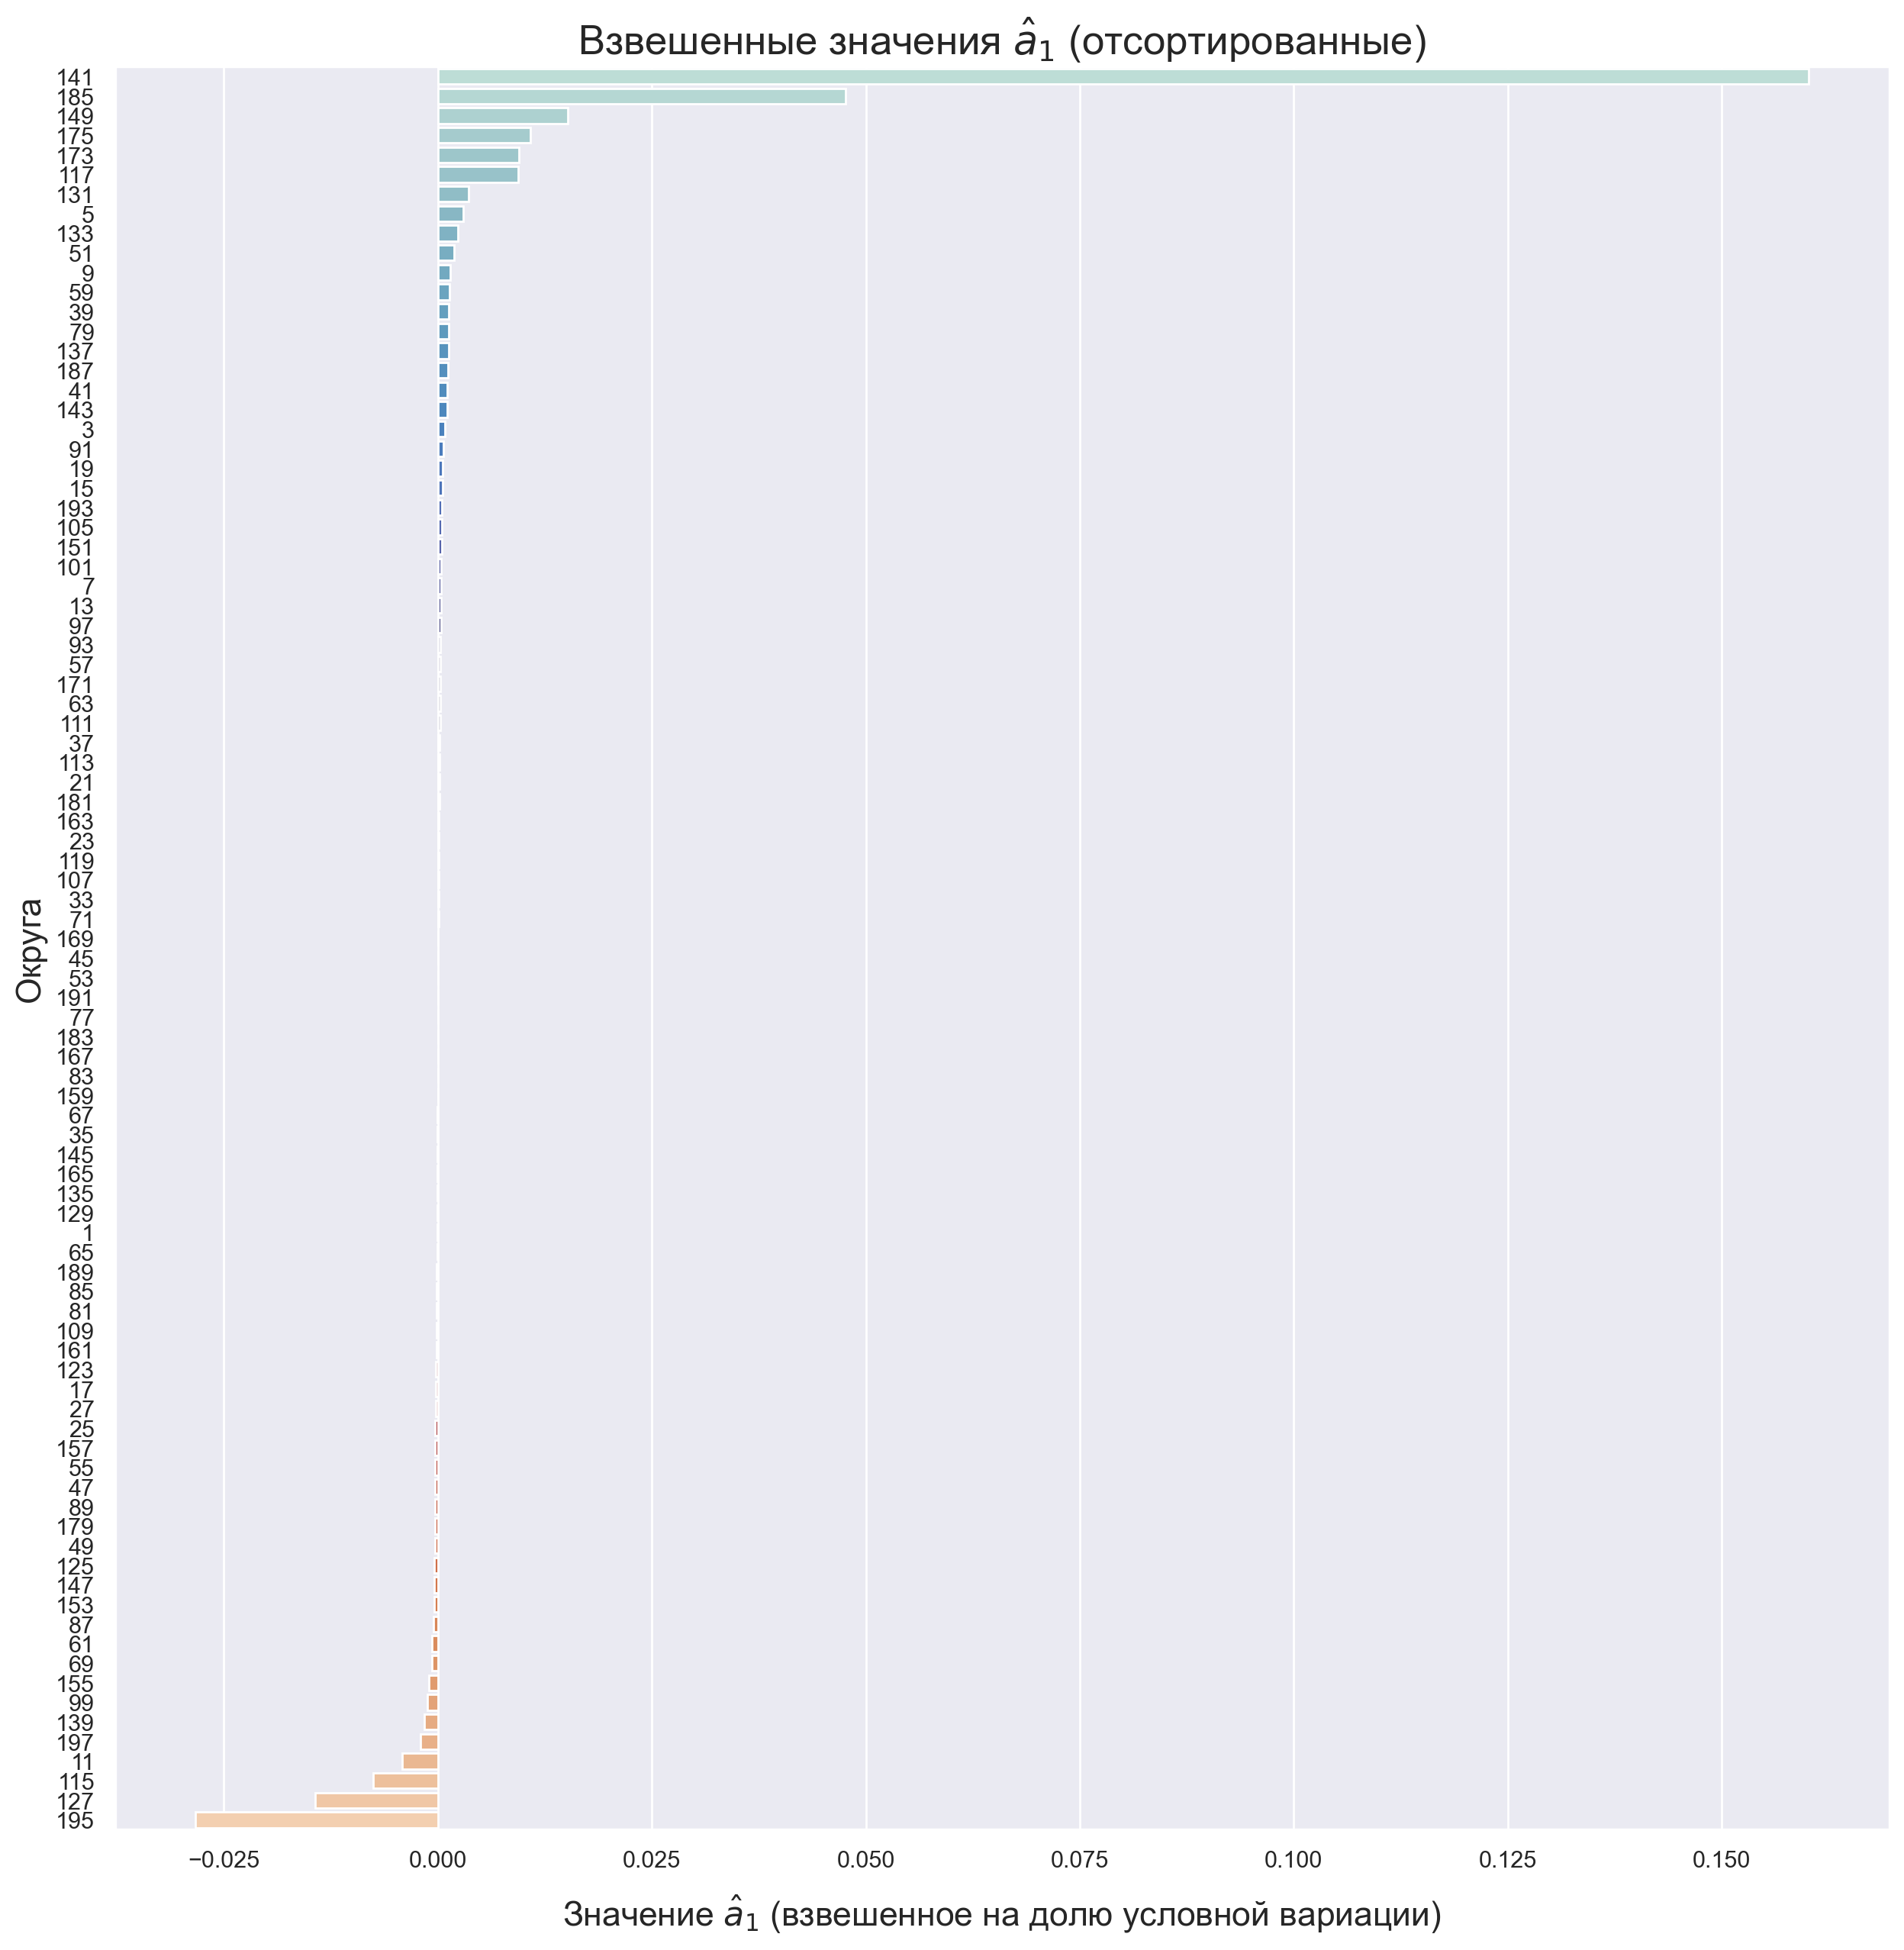

In [58]:
plot = sns.barplot(x=beta3, y=counties3, palette='icefire')
plot.figure.set_size_inches(15, 15)

plt.title('Взвешенные значения $\hat{a}_1$ (отсортированные)', fontsize=19)
plt.xlabel('Значение $\hat{a}_1$ (взвешенное на долю условной вариации)', fontsize=16, labelpad=10.0)
plt.ylabel('Округа', fontsize=16)

plt.show()

In [59]:
plot.figure.savefig("fig10.pdf")

In [60]:
dataset_1.head()

,county,var(lnpolice)
62,141,2.926936
83,185,1.474635
66,149,0.391330
79,175,0.290386
88,195,0.220718


In [61]:
dataset_3.head()

,county,var(x_clear)
62,141,2.895605
83,185,1.492456
66,149,0.414273
79,175,0.290664
88,195,0.215462


In [62]:
sum(dataset_1['var(lnpolice)']), sum(dataset_3['var(x_clear)'])

(6.378170963818942, 6.330948072887174)